In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import hddm 
from patsy import dmatrix 
import numpy as np
from sys import platform
print(hddm.__version__)

%matplotlib inline
# plt.rcParams['figure.figsize'] = 30, 10
sns.set_context("notebook", font_scale=10, rc={"lines.linewidth": 10, "lines.markersize": 30})

0.6.0


## Pre-processing

In [3]:
if platform == 'linux':
    home = '/home/krista/'
elif platform == 'darwin': 
    home = '/Users/67981492/'

In [4]:
!pwd
write_dir = home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/'

/home/krista/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/analysis_nbs


In [5]:
all_sim_data = hddm.load_csv(home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/probC_sim_learning_signals_processed.csv')

In [6]:
all_sim_data.head(10)

cpp  target_B  choice_B  cp  gen_drift  gen_bound     rt    acc  \
0  0.099471  0.000000  0.000000   1   0.013572   0.416406  0.700  False   
1  0.035079  0.000000  0.000000   0   0.013572   0.599471  0.700  False   
2  0.023075 -1.241007  1.241007   0   0.013572   0.535079  0.700  False   
3  0.019881 -0.595781  0.595781   0  -1.000000   0.523075  0.172  False   
4  0.018539 -0.306135  0.306135   0  -1.000000   0.519881  0.172  False   
5  0.268538 -0.139394  0.139394   0  -1.000000   0.518539  0.172  False   
6  0.035630 -0.027685  0.027685   0  -1.000000   0.768538  0.172  False   
7  0.785155 -0.804363  0.804363   0  -1.000000   0.535630  0.172  False   
8  0.352873  0.064818 -0.064818   0  -1.000000   1.285155  0.172  False   
9  0.206726 -2.800194  2.800194   0  -0.935182   0.852873  0.192  False   

   subj_idx   ID        ...         correct_id_choices      b_t0      b_t1  \
0         0  761        ...                          1  0.000000  0.000000   
1         0  761        ...                          1  1.390214  0.149207   
2         0  761        ...                          1  0.792372  0.196591   
3         0  761        ...                          1  0.532802  0.226667   
4         0  761        ...                          1  0.391376  0.251982   
5         0  761        ...                          1  0.302804  0.275119   
6         0  761        ...                          1  1.408409  0.604046   
7         0  761        ...                          1  0.571150  0.635969   
8         0  761        ...                          1  4.114561  1.314367   
9         0  761        ...                          1  0.822059  1.379872   

       r_t1      r_t2  obs_cp  trial   ideal_B  B_ideal_target  \
0  2.528877  0.000000       0      1  0.000000        0.000000   
1  0.000000  3.978021       1      2 -1.241007        0.149207   
2  0.000000  2.754457       0      3 -0.595781        0.196591   
3  0.000000  3.330826       0      4 -0.306135        0.226667   
4  0.000000  2.527291       0      5 -0.139394        0.251982   
5  3.036967  0.000000       1      6 -0.027685        0.275119   
6  0.000000  3.361235       1      7 -0.804363        0.604046   
7  4.661588  0.000000       1      8  0.064818        0.635969   
8 -0.099227  0.000000       0      9 -2.800194        1.314367   
9  4.103838  0.000000       0     10  0.557813        1.379872   

   B_nonideal_target  
0           0.000000  
1           1.390214  
2           0.792372  
3           0.532802  
4           0.391376  
5           0.302804  
6           1.408409  
7           0.571150  
8           4.114561  
9           0.822059  

[10 rows x 22 columns]

In [7]:
all_sim_data.columns = all_sim_data.columns.str.strip()
all_sim_data.head()

cpp  target_B  choice_B  cp  gen_drift  gen_bound     rt    acc  \
0  0.099471  0.000000  0.000000   1   0.013572   0.416406  0.700  False   
1  0.035079  0.000000  0.000000   0   0.013572   0.599471  0.700  False   
2  0.023075 -1.241007  1.241007   0   0.013572   0.535079  0.700  False   
3  0.019881 -0.595781  0.595781   0  -1.000000   0.523075  0.172  False   
4  0.018539 -0.306135  0.306135   0  -1.000000   0.519881  0.172  False   

   subj_idx   ID        ...         correct_id_choices      b_t0      b_t1  \
0         0  761        ...                          1  0.000000  0.000000   
1         0  761        ...                          1  1.390214  0.149207   
2         0  761        ...                          1  0.792372  0.196591   
3         0  761        ...                          1  0.532802  0.226667   
4         0  761        ...                          1  0.391376  0.251982   

       r_t1      r_t2  obs_cp  trial   ideal_B  B_ideal_target  \
0  2.528877  0.000000       0      1  0.000000        0.000000   
1  0.000000  3.978021       1      2 -1.241007        0.149207   
2  0.000000  2.754457       0      3 -0.595781        0.196591   
3  0.000000  3.330826       0      4 -0.306135        0.226667   
4  0.000000  2.527291       0      5 -0.139394        0.251982   

   B_nonideal_target  
0           0.000000  
1           1.390214  
2           0.792372  
3           0.532802  
4           0.391376  

[5 rows x 22 columns]

In [8]:
all_sim_data.columns

Index(['cpp', 'target_B', 'choice_B', 'cp', 'gen_drift', 'gen_bound', 'rt',
       'acc', 'subj_idx', 'ID', 'cond', 'id_choices', 'correct_id_choices',
       'b_t0', 'b_t1', 'r_t1', 'r_t2', 'obs_cp', 'trial', 'ideal_B',
       'B_ideal_target', 'B_nonideal_target'],
      dtype='object')

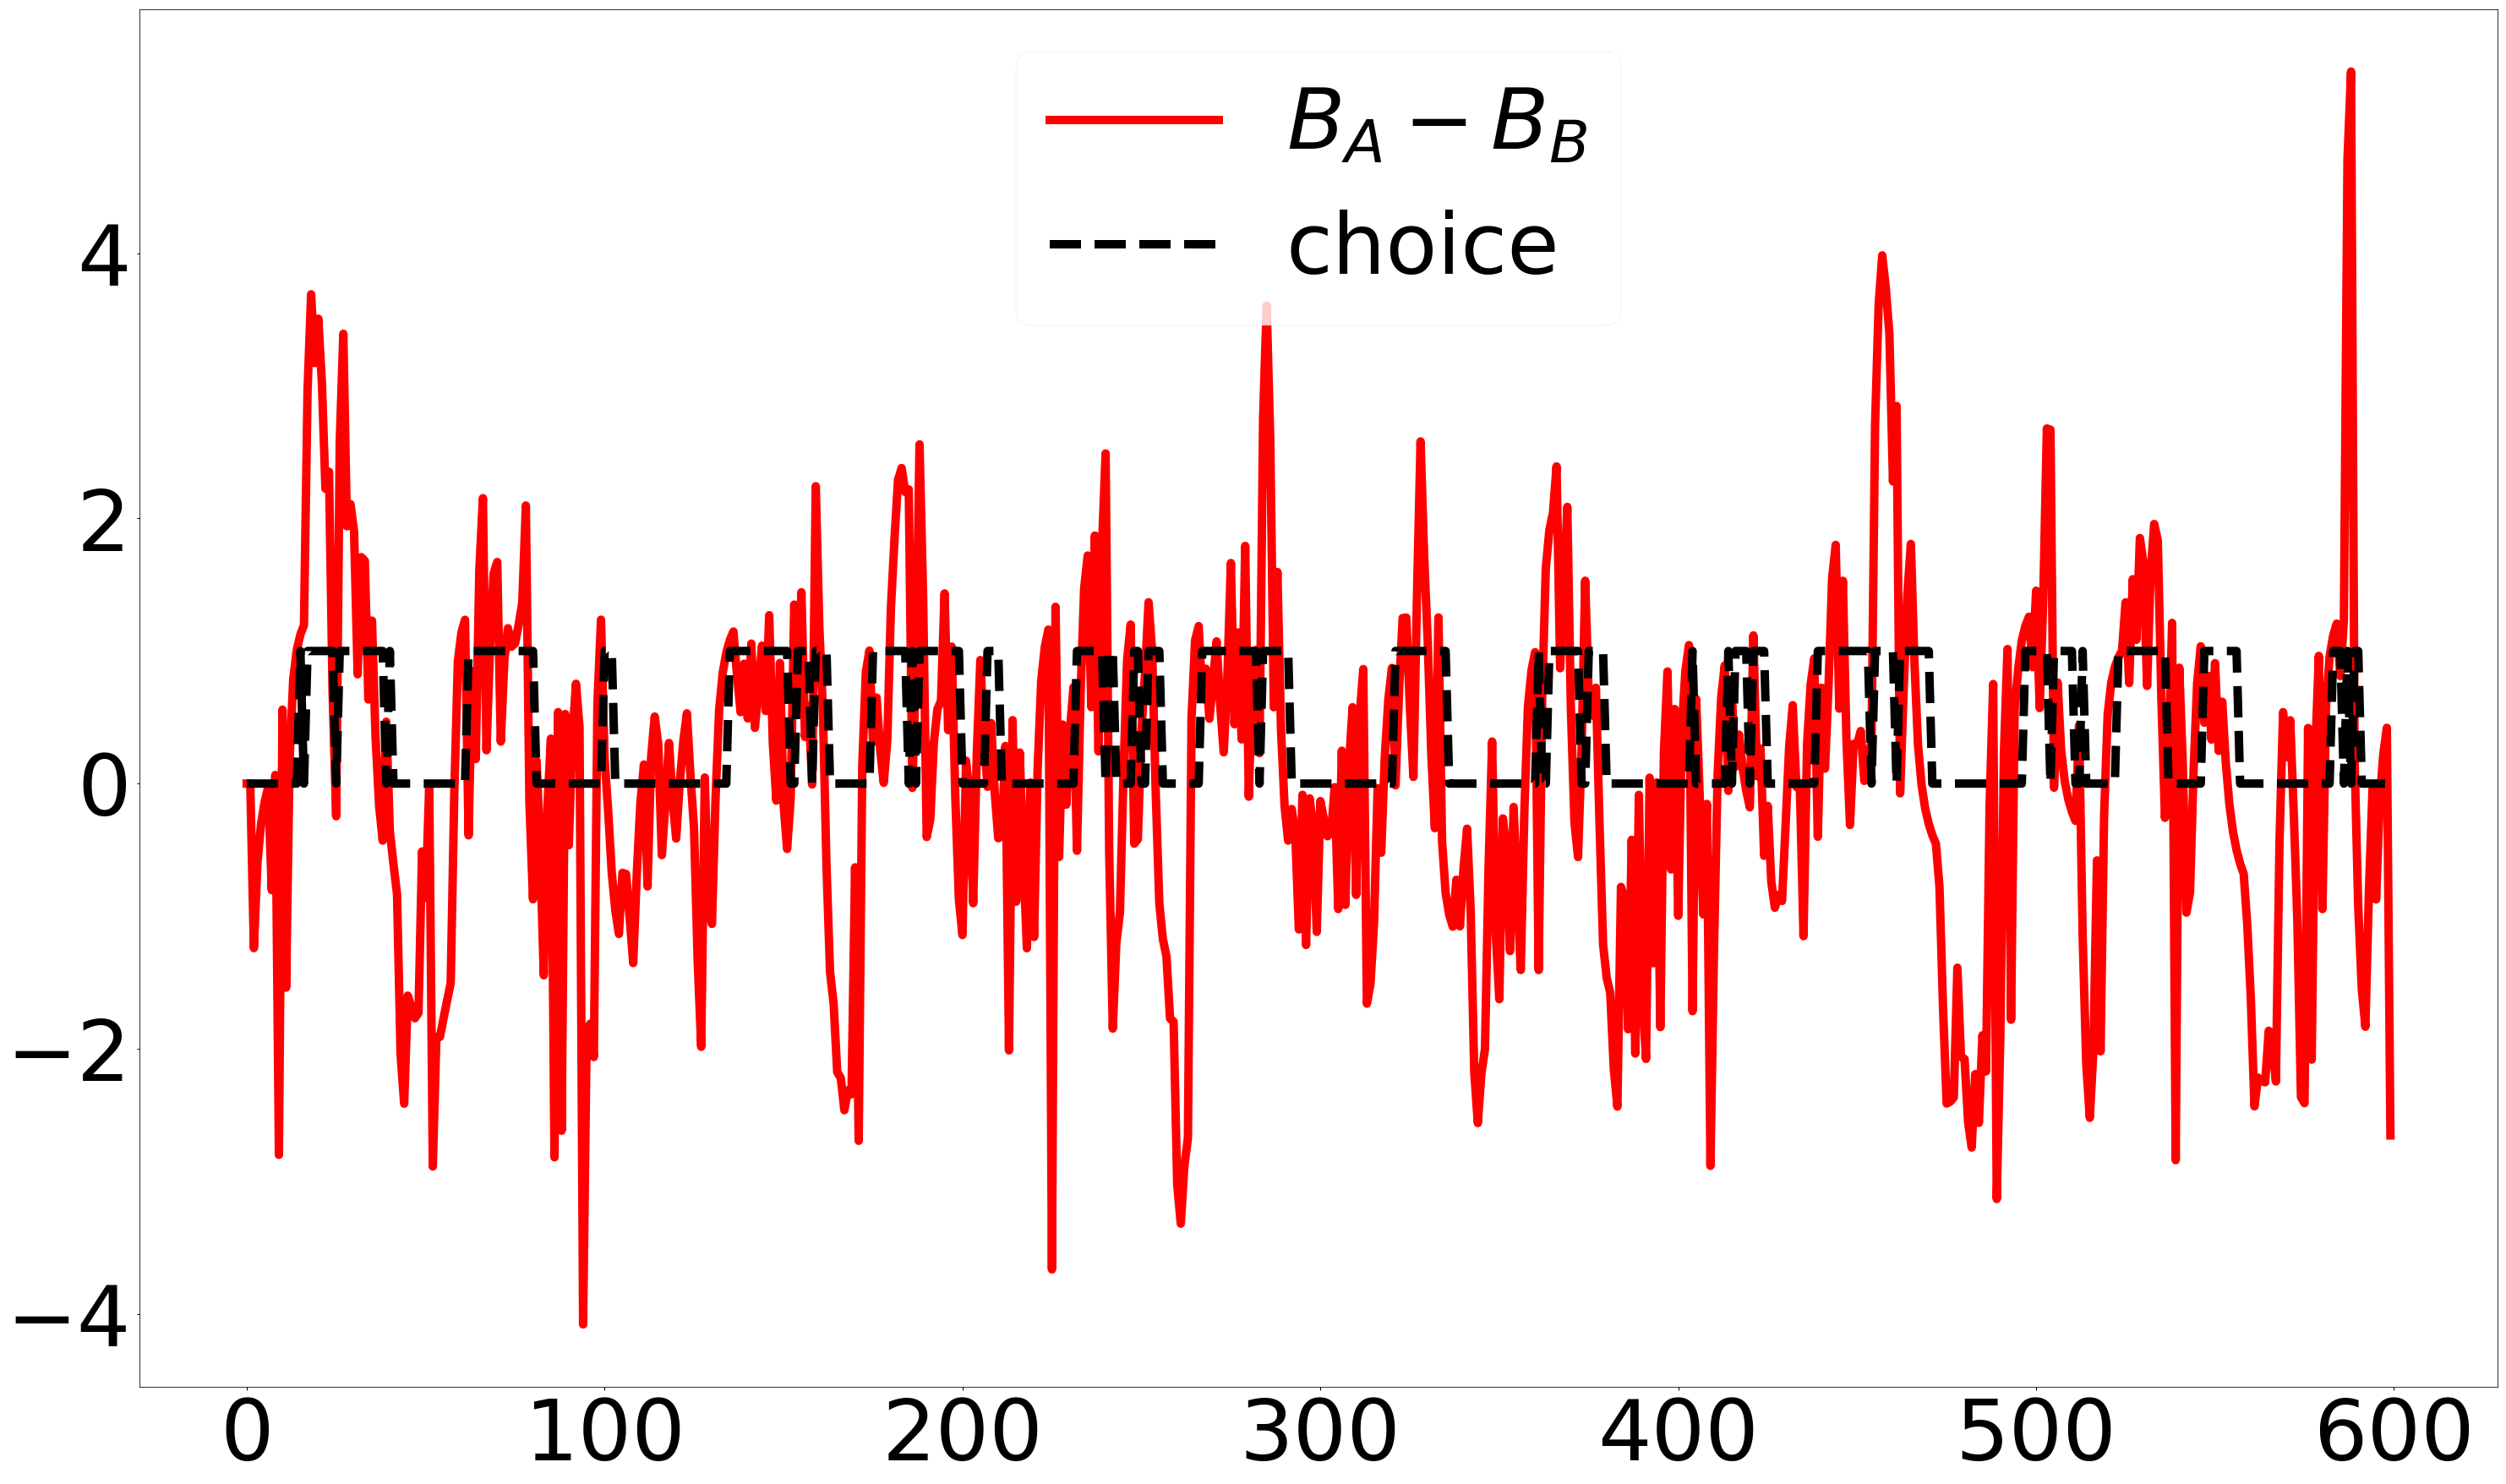

In [9]:
plt.figure(figsize=(50,30))
plt.plot(all_sim_data.target_B[0:600], 'r', label='$B_{A} - B_{B}$')
plt.plot(all_sim_data.id_choices[0:600], 'k--', label='choice')
plt.legend()

Text(0,0.5,'$B_{choice} - B_{nonchoice}$')

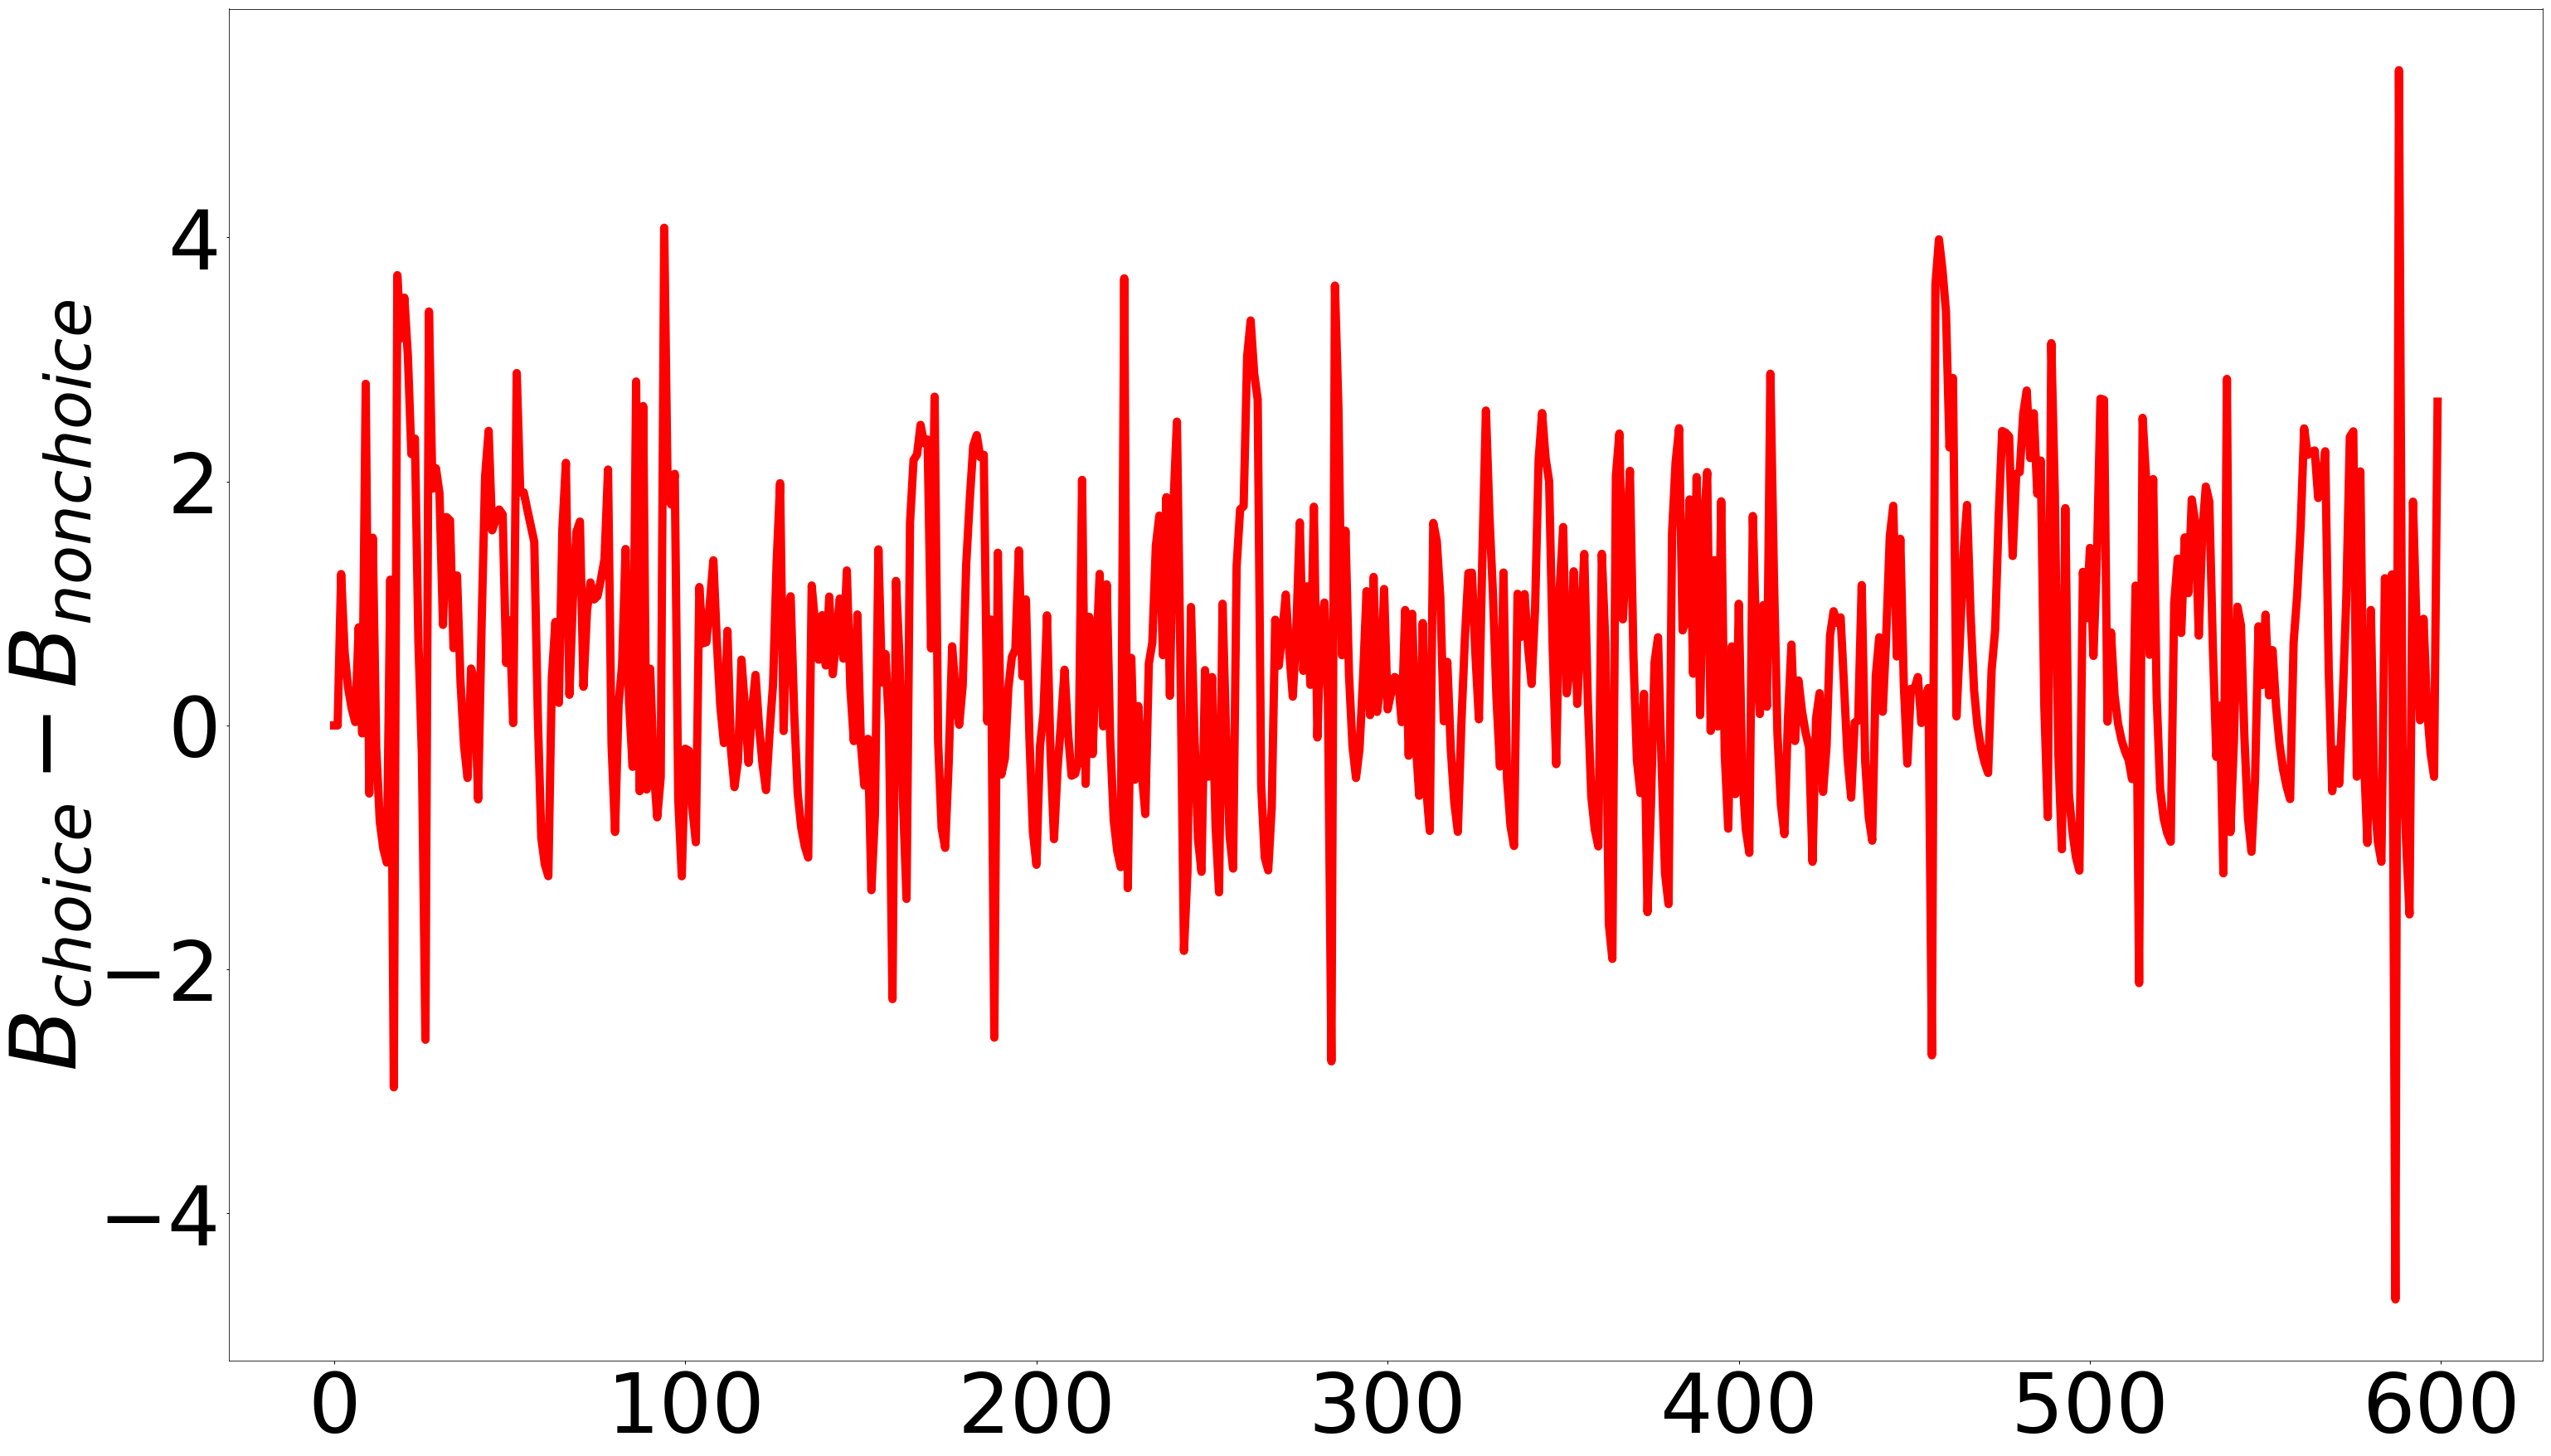

In [10]:
plt.figure(figsize=(50,30))
plt.plot(all_sim_data.choice_B[0:600], 'r')
plt.ylabel('$B_{choice} - B_{nonchoice}$')

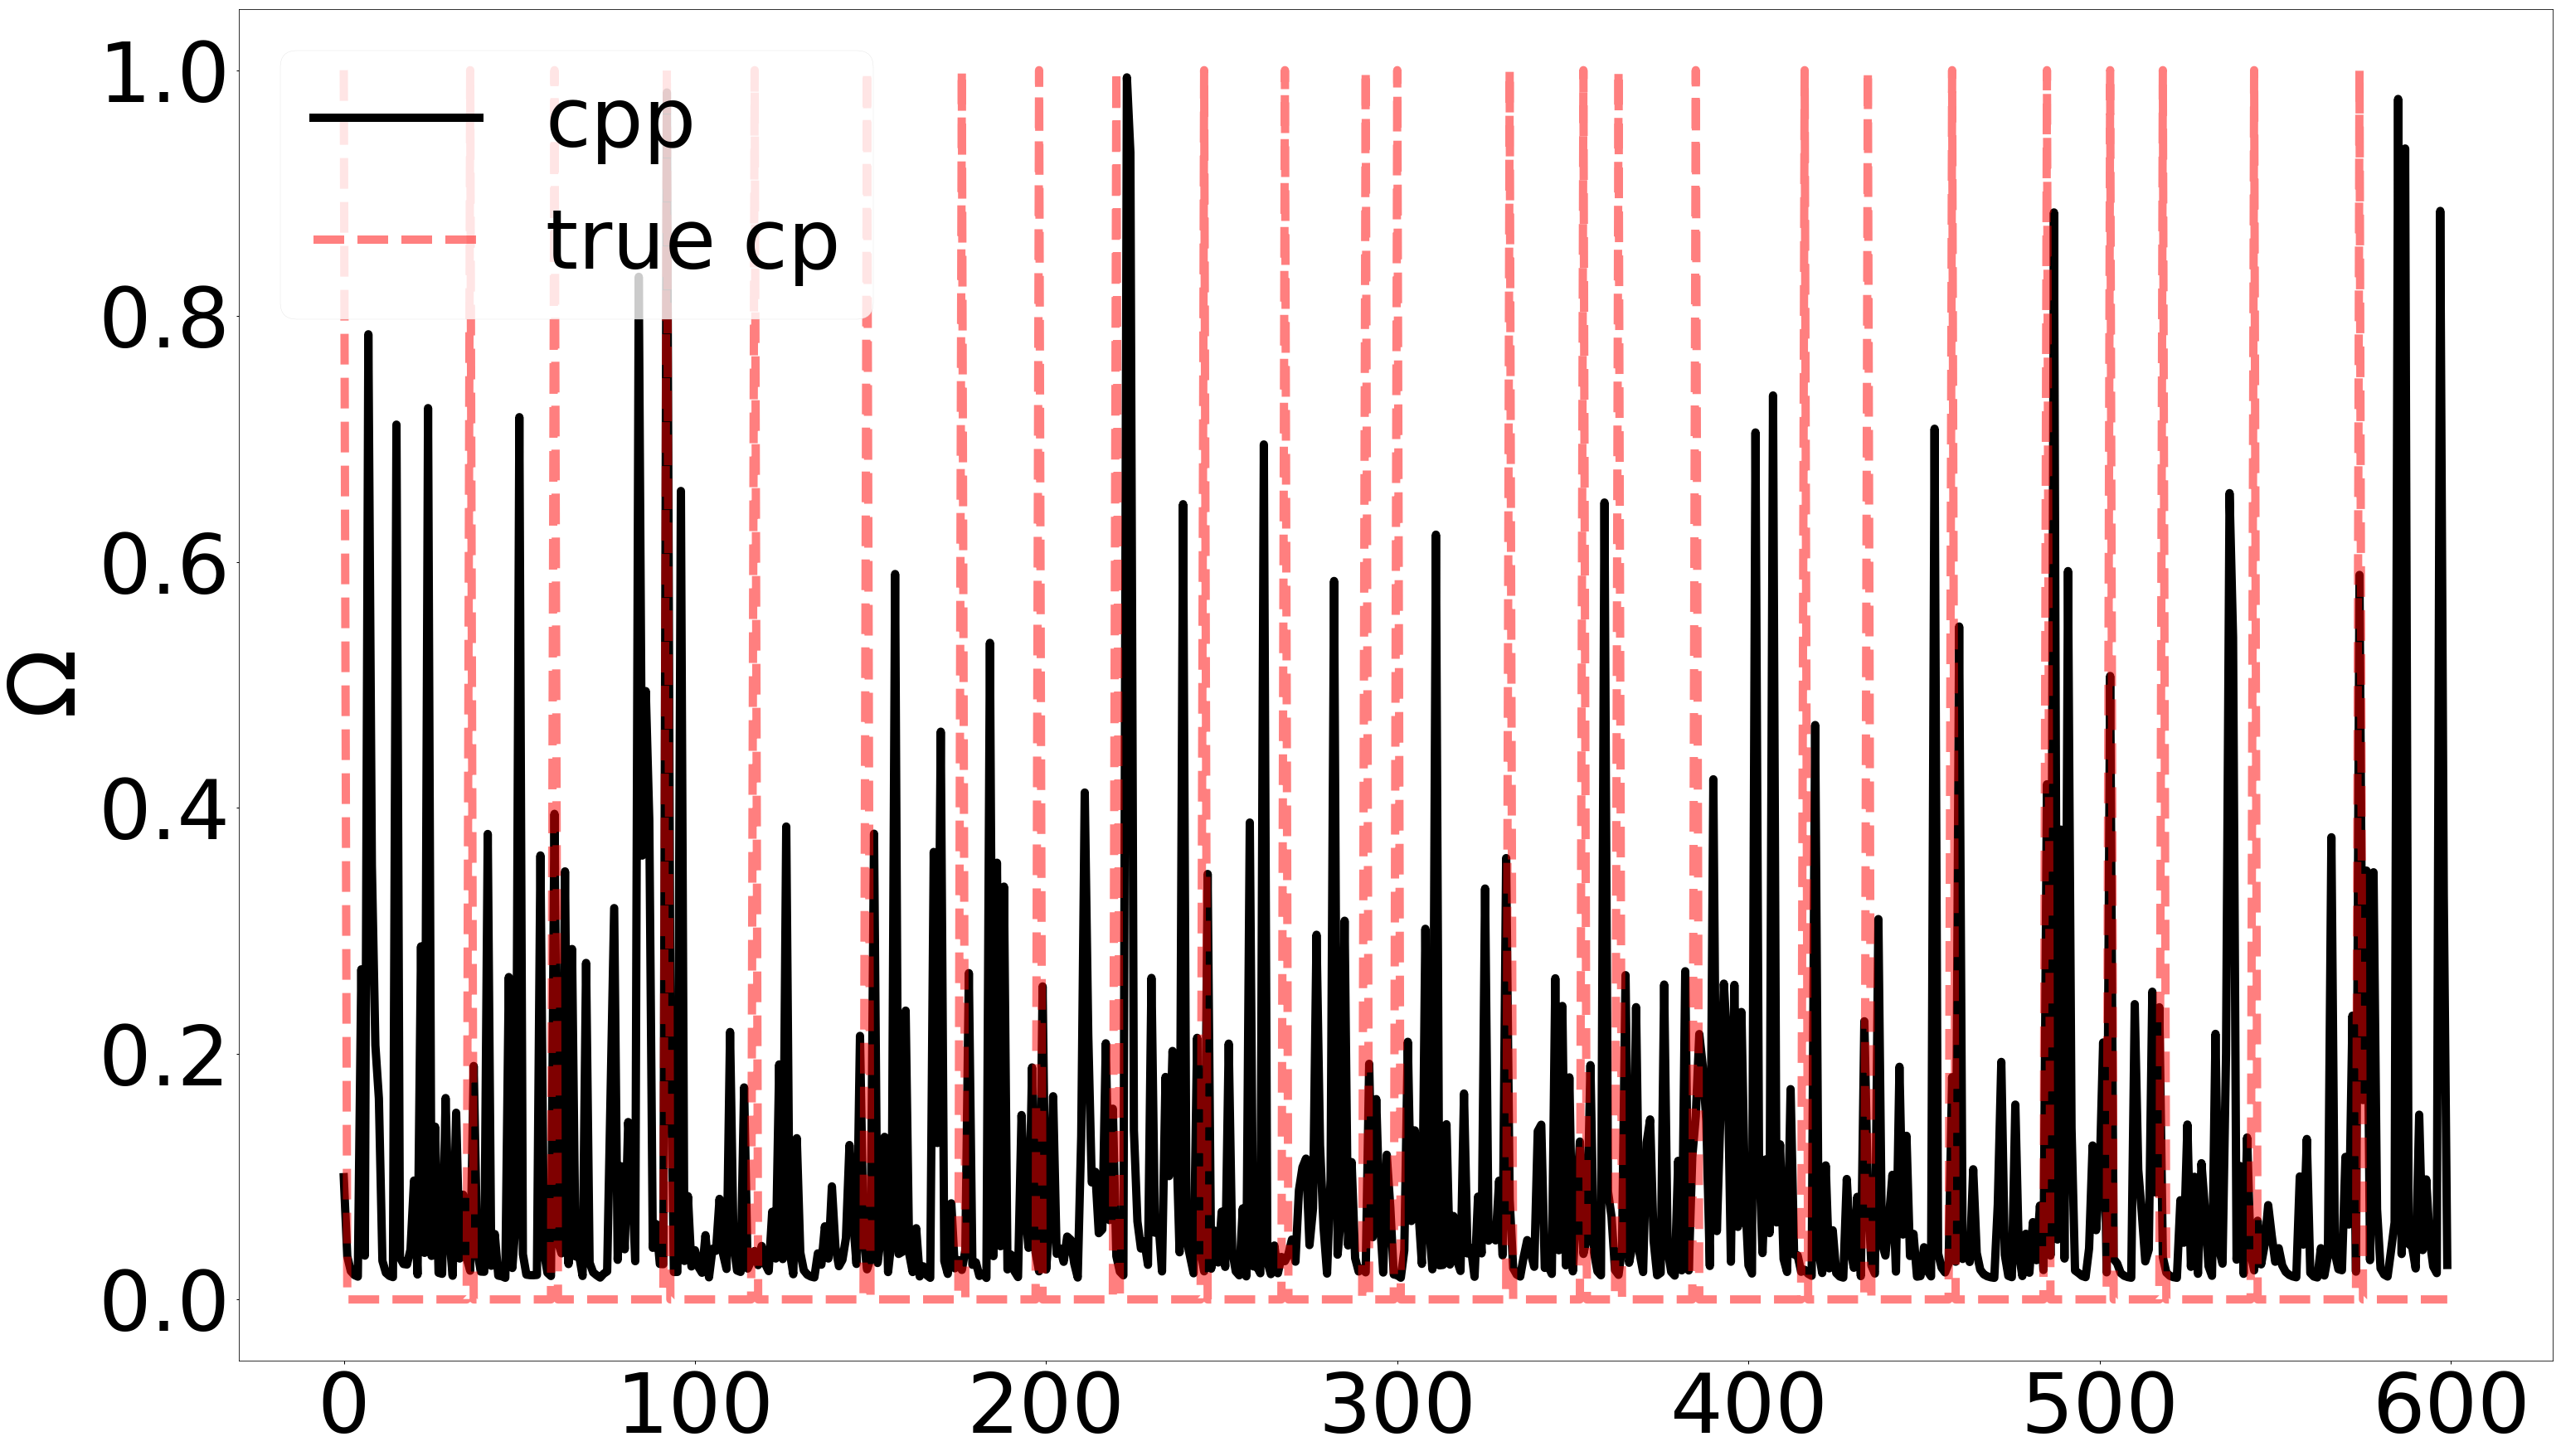

In [11]:
plt.figure(figsize=(50,30))
plt.plot(all_sim_data.cpp[0:600], 'k', label='cpp')
plt.plot(all_sim_data.cp[0:600], 'r--', alpha=0.5, label='true cp')
plt.ylabel('$\Omega$')
plt.legend(frameon=1,loc='upper left')

In [12]:
#use target choice as response 
#include correct target choice as stimulus 
all_sim_data = all_sim_data.rename(index=str, columns={"id_choices": "response", 
                                                       "correct_id_choices": "stimulus"})
all_sim_data = all_sim_data[['response', 'stimulus', 'rt', 'cond', 'subj_idx', 'target_B', 'cpp']] 
# #use target-based belief in reward difference (b_t0 - b_t1)
all_sim_data = all_sim_data.rename(index=str, columns={'target_B': 'B'})
all_sim_data = all_sim_data[(all_sim_data.rt<0.6)]
all_sim_data.reset_index(drop=True, inplace=True)

In [13]:
all_sim_data['cond'] = all_sim_data['cond'].str.strip()
all_sim_data.head()

response  stimulus     rt cond  subj_idx         B       cpp
0         0         1  0.172   hc         0 -0.595781  0.019881
1         0         1  0.172   hc         0 -0.306135  0.018539
2         0         1  0.172   hc         0 -0.139394  0.268538
3         0         1  0.172   hc         0 -0.027685  0.035630
4         0         1  0.172   hc         0 -0.804363  0.785155

In [14]:
np.unique(all_sim_data.subj_idx), np.unique(all_sim_data.cond)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 array(['hc', 'hv', 'lc', 'lv'], dtype=object))

In [15]:
#these are no longer error flipped but stimulus flipped 
# all_sim_data = hddm.utils.flip_errors(all_sim_data)

In [16]:
# plt.rcParams['figure.figsize'] = 30, 10
# sns.set(font_scale=5)
# fig = plt.figure()
# ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
# for i, subj_data in all_sim_data.groupby('subj_idx'):
#     subj_data.rt.hist(bins=20, histtype='stepfilled', ax=ax)

In [17]:
all_sim_data.columns

Index(['response', 'stimulus', 'rt', 'cond', 'subj_idx', 'B', 'cpp'], dtype='object')

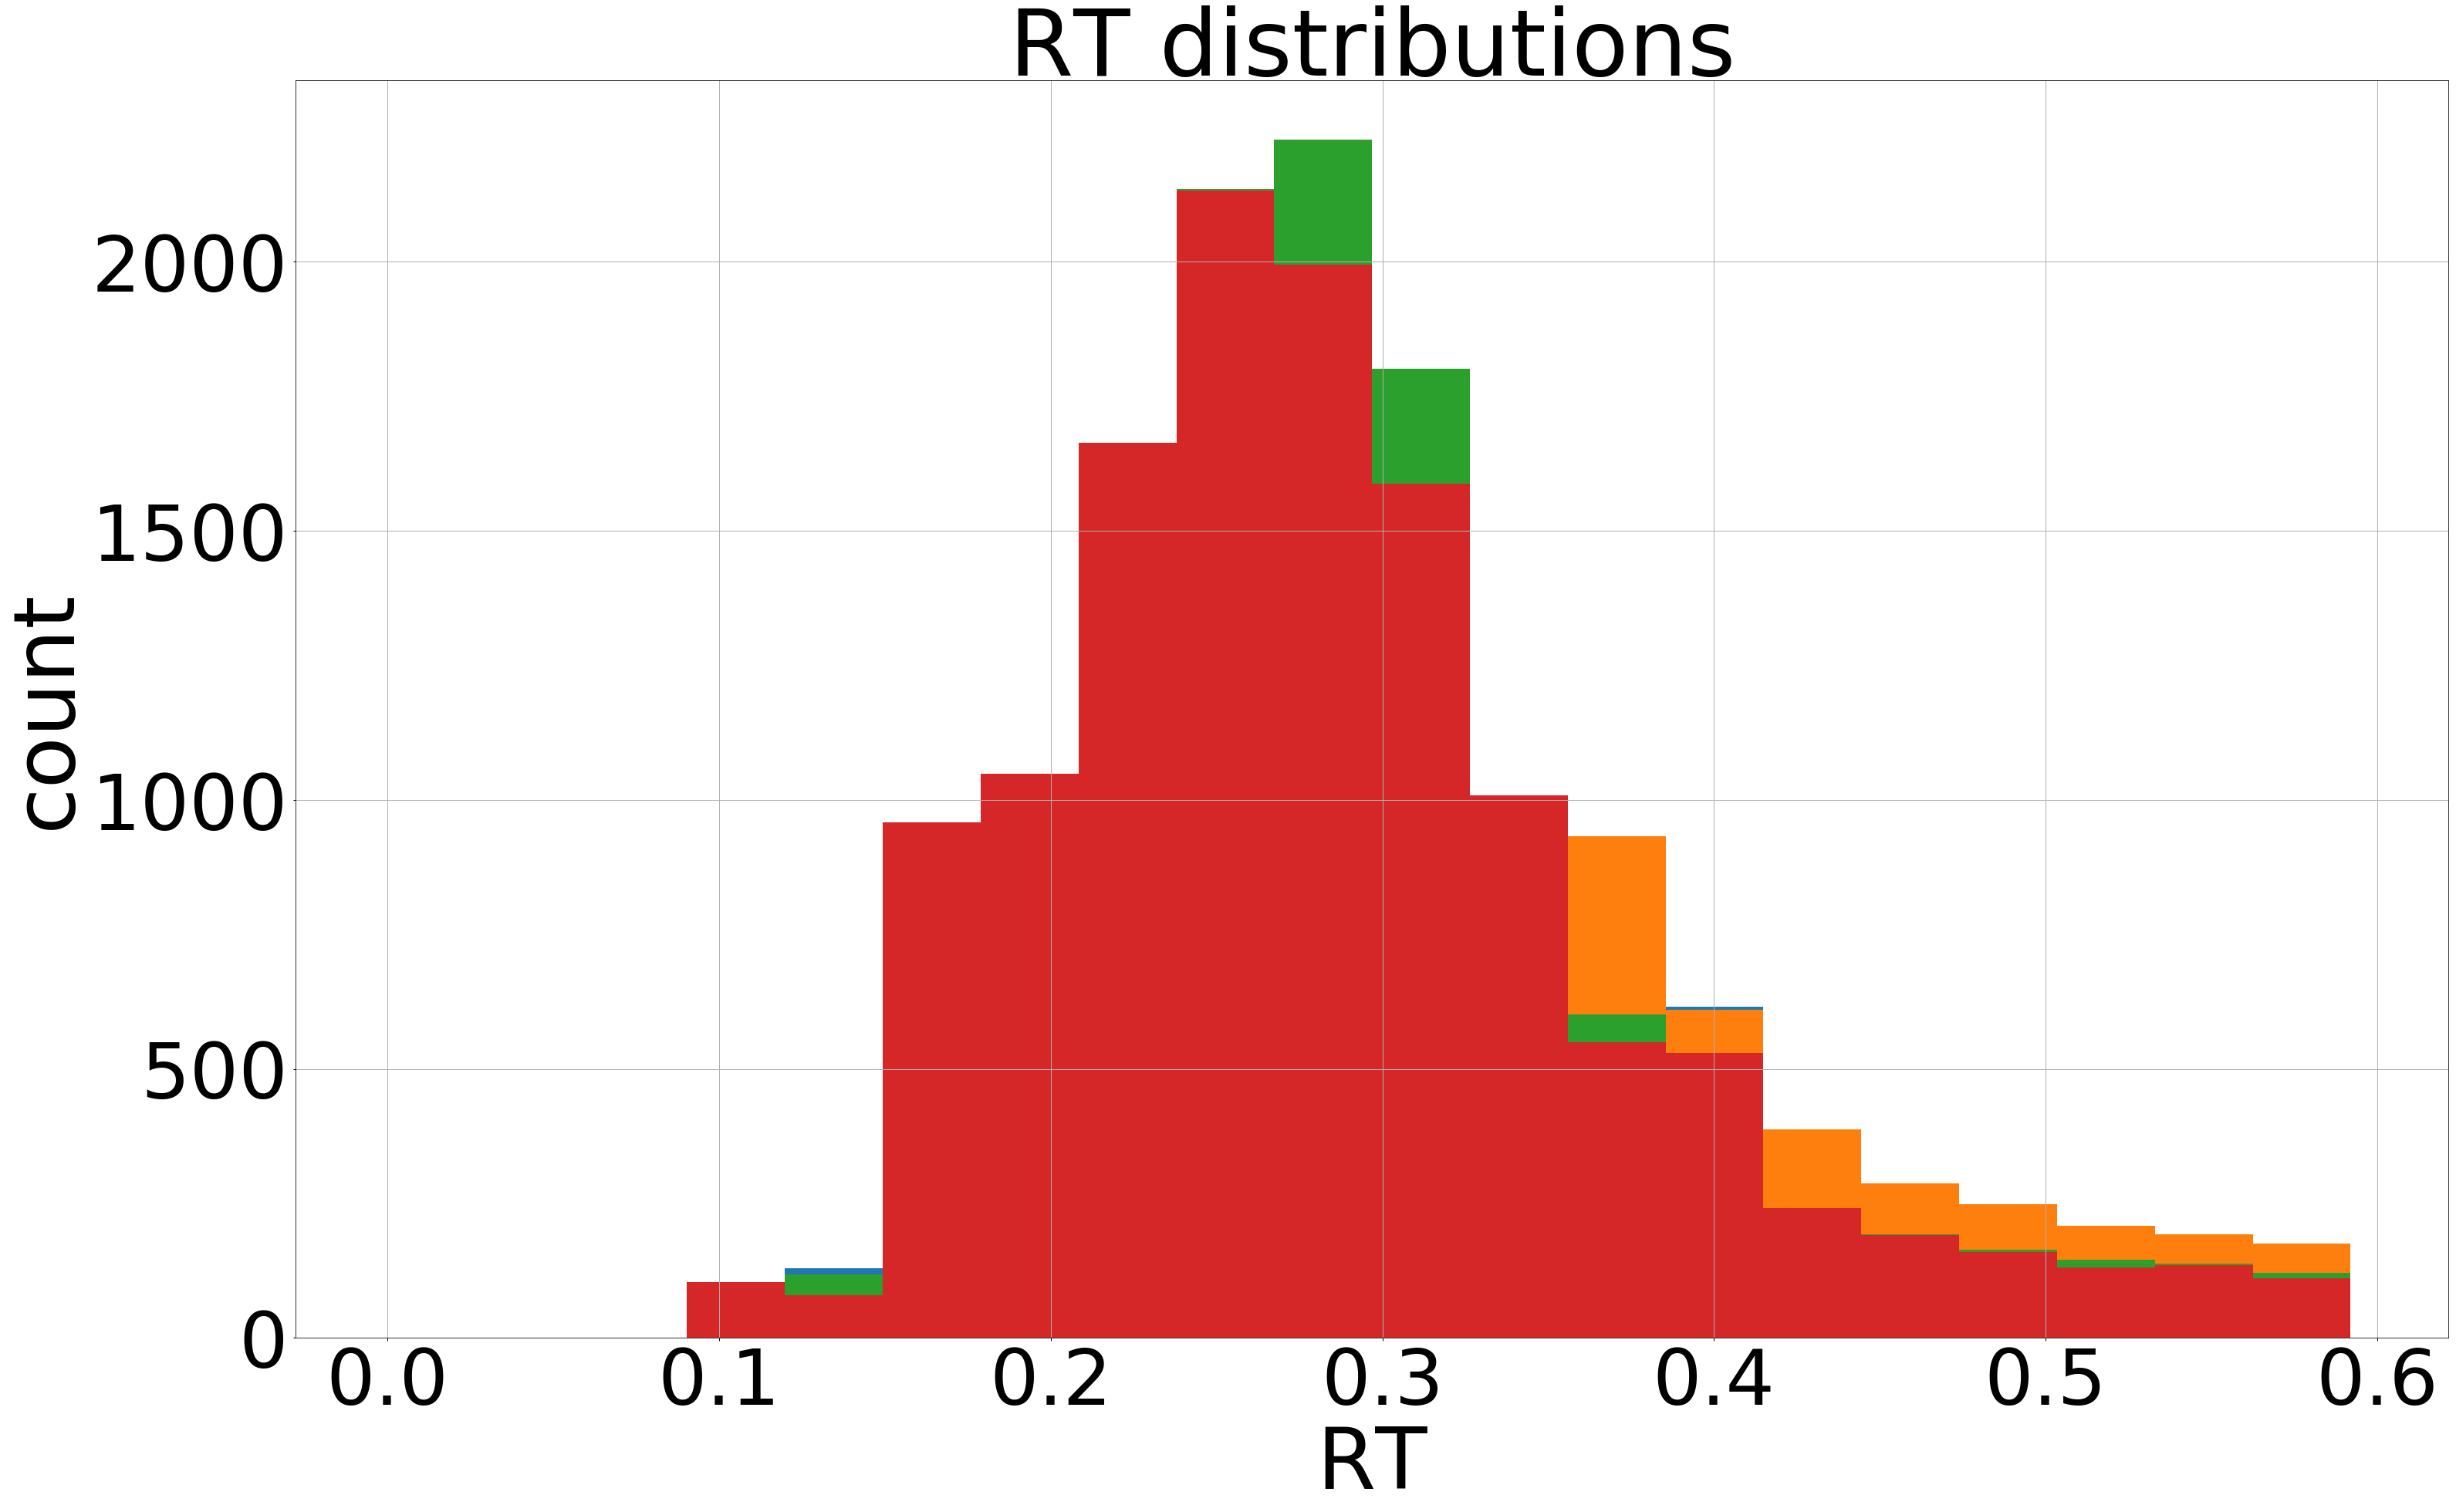

In [18]:
fig=plt.figure(figsize=(50,30))
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in all_sim_data.groupby('cond'):
    subj_data.rt.hist(bins=20, histtype='stepfilled', ax=ax)

Text(0,0.5,'B')

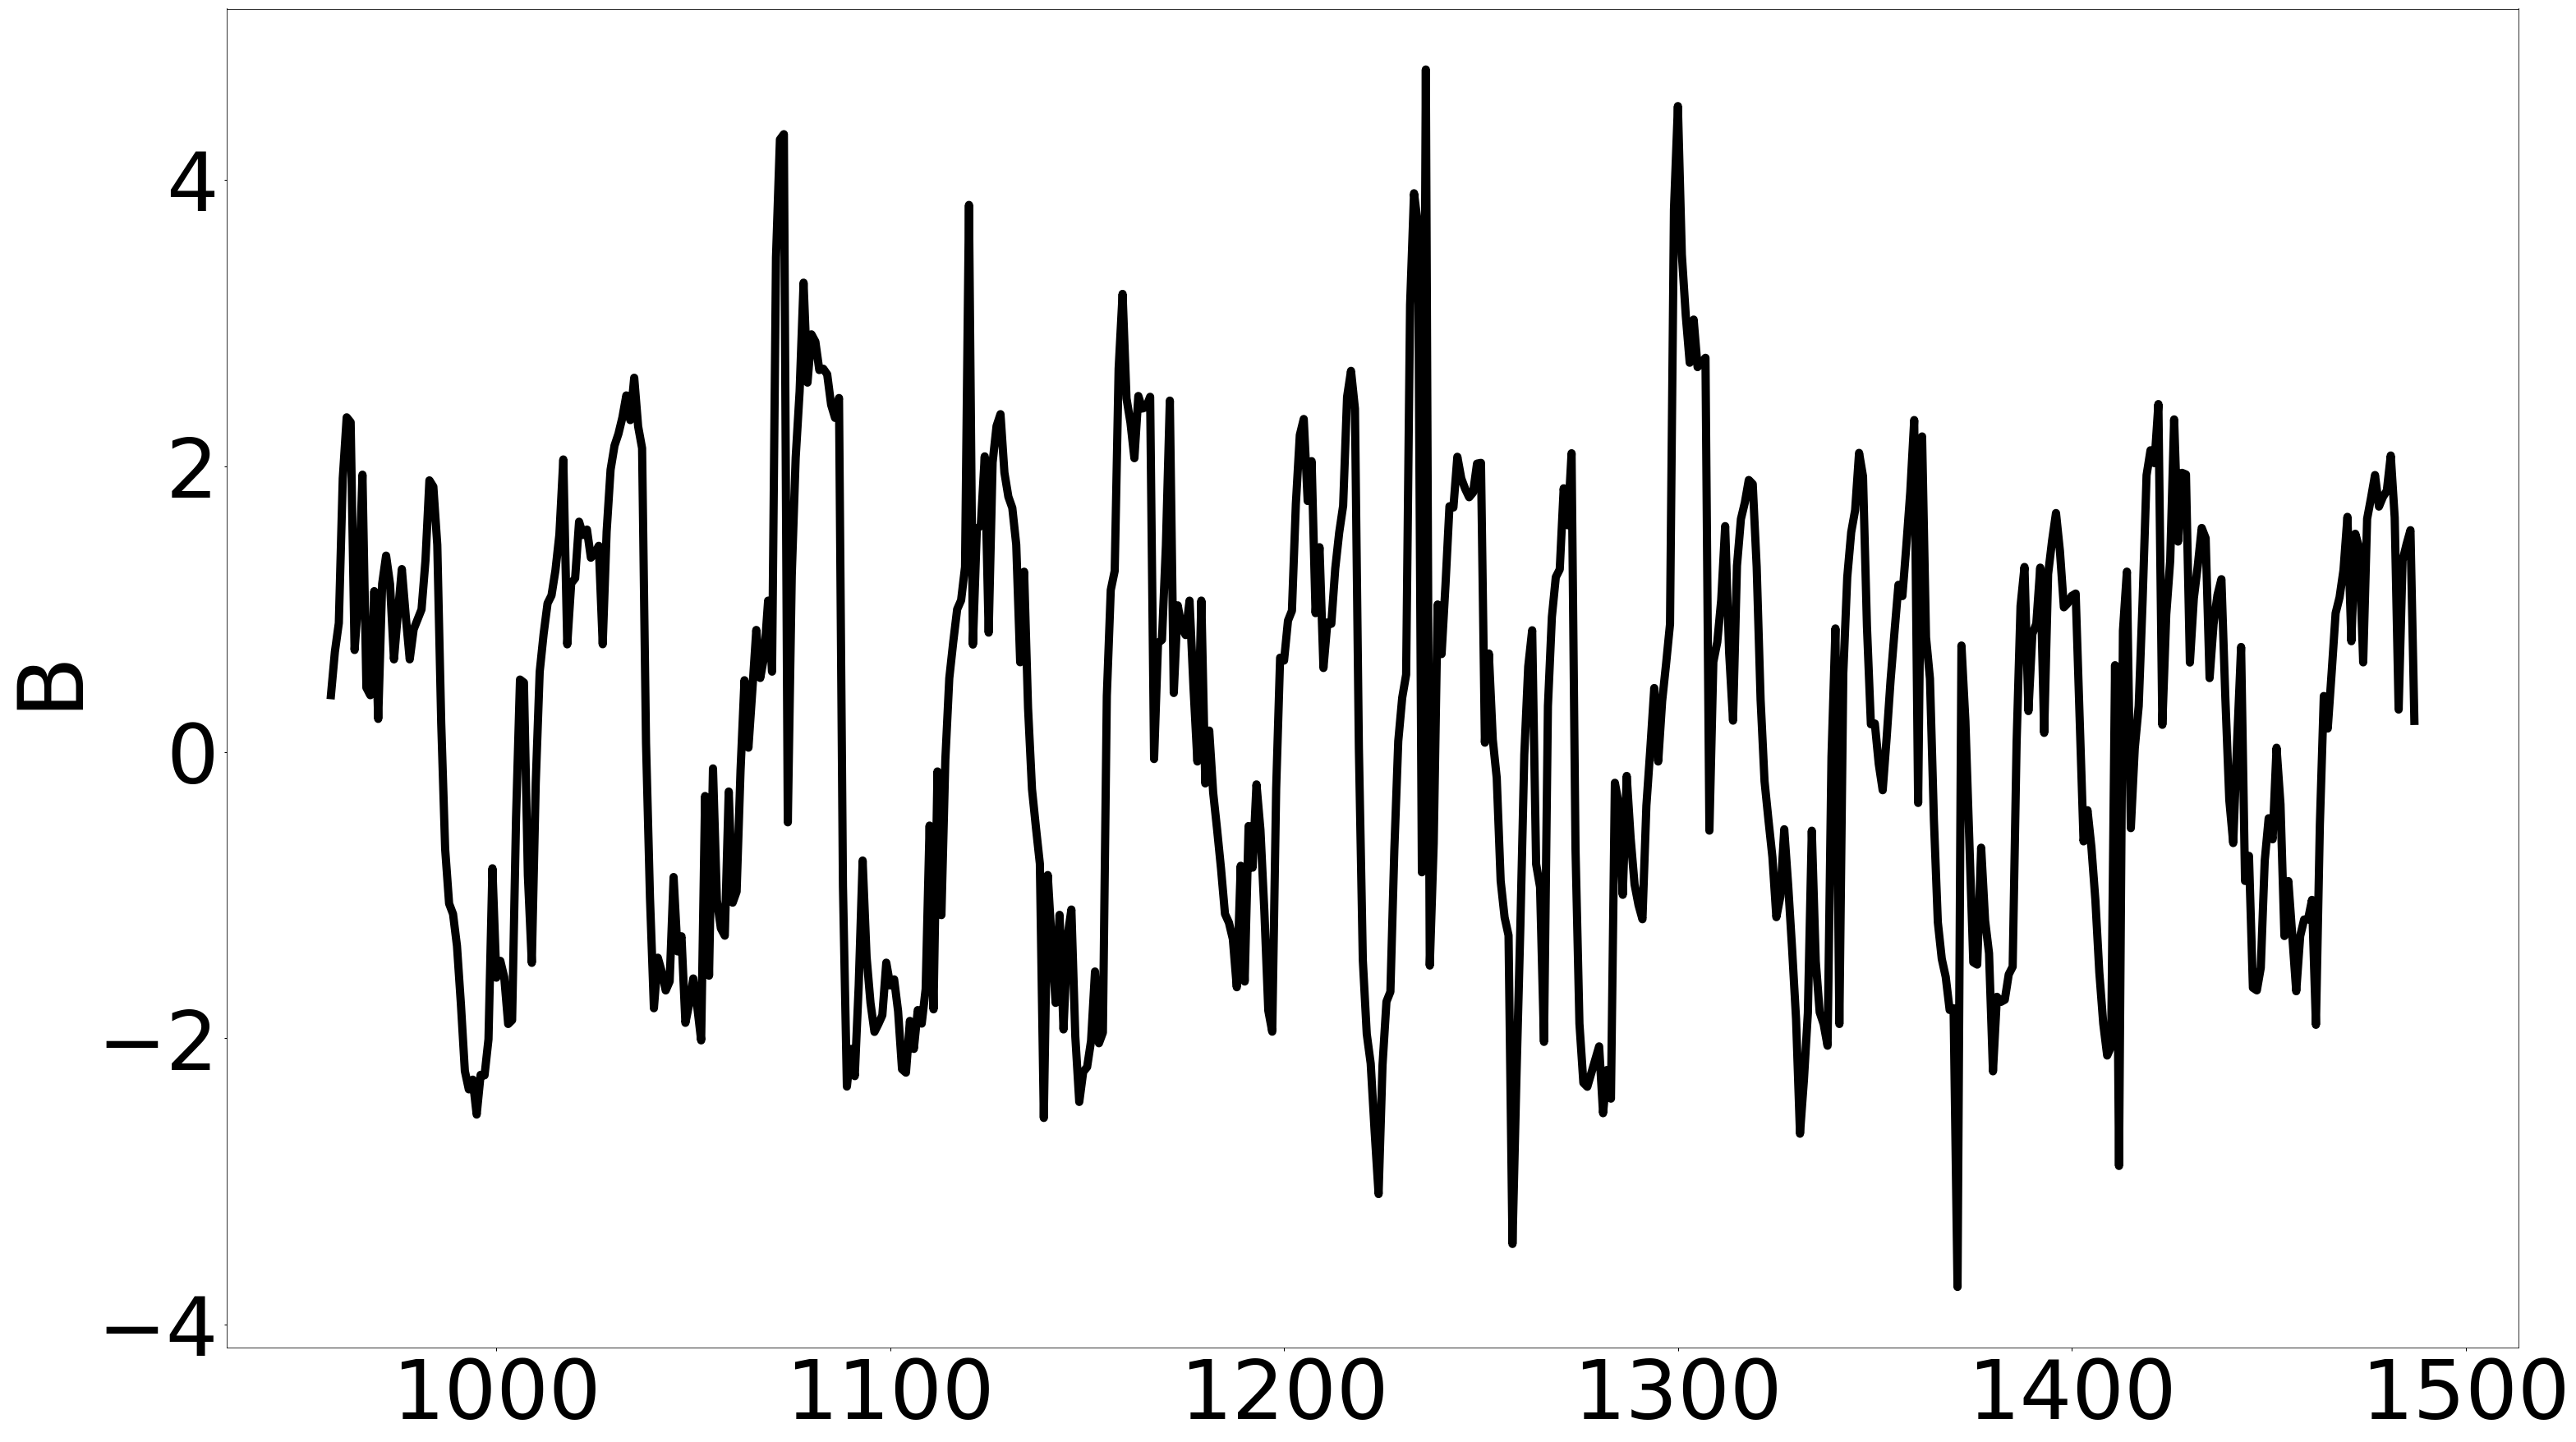

In [19]:
plt.figure(figsize=(50,30))
plt.plot(all_sim_data.B[(all_sim_data.subj_idx == 0) & (all_sim_data.cond == 'lc')], 'k')
plt.ylabel('B')

Text(0,0.5,'stimulus selected')

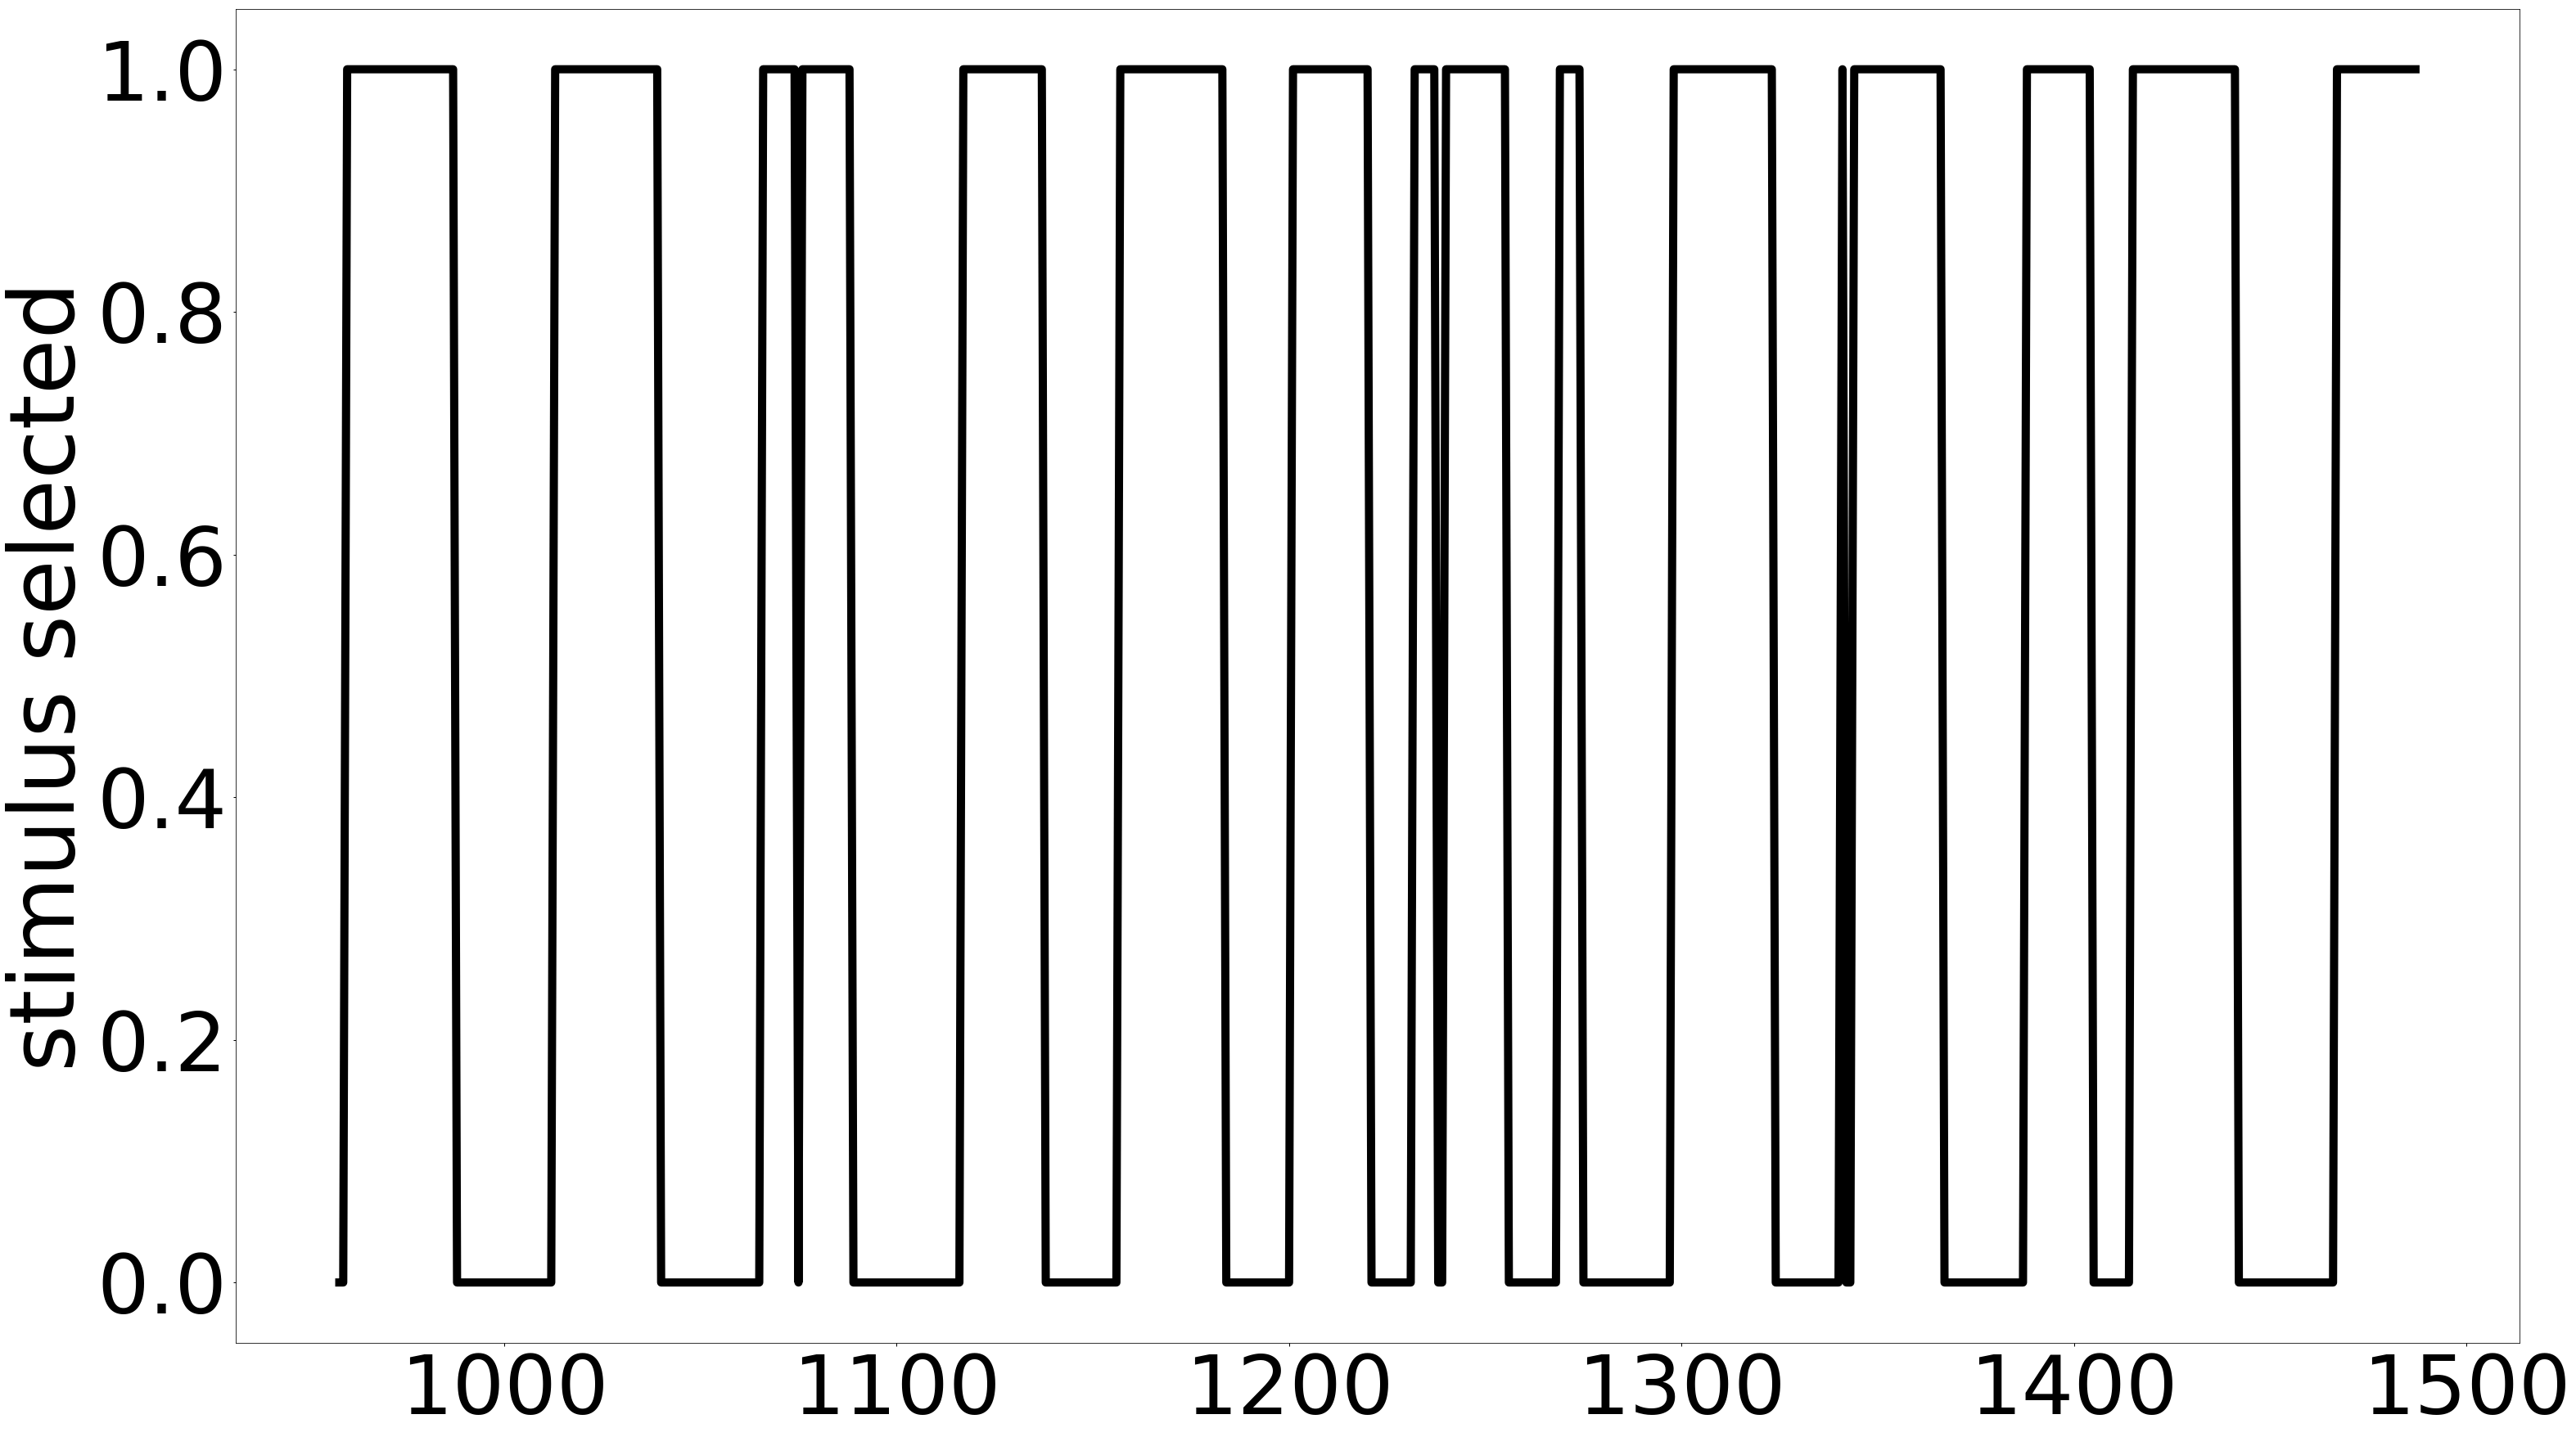

In [20]:
plt.figure(figsize=(50,30))
plt.plot(all_sim_data.response[(all_sim_data.subj_idx == 0) & (all_sim_data.cond == 'lc')], 'k')
plt.ylabel('stimulus selected')

In [21]:
all_sim_data.columns

Index(['response', 'stimulus', 'rt', 'cond', 'subj_idx', 'B', 'cpp'], dtype='object')

Text(0,0.5,'simulated rt')

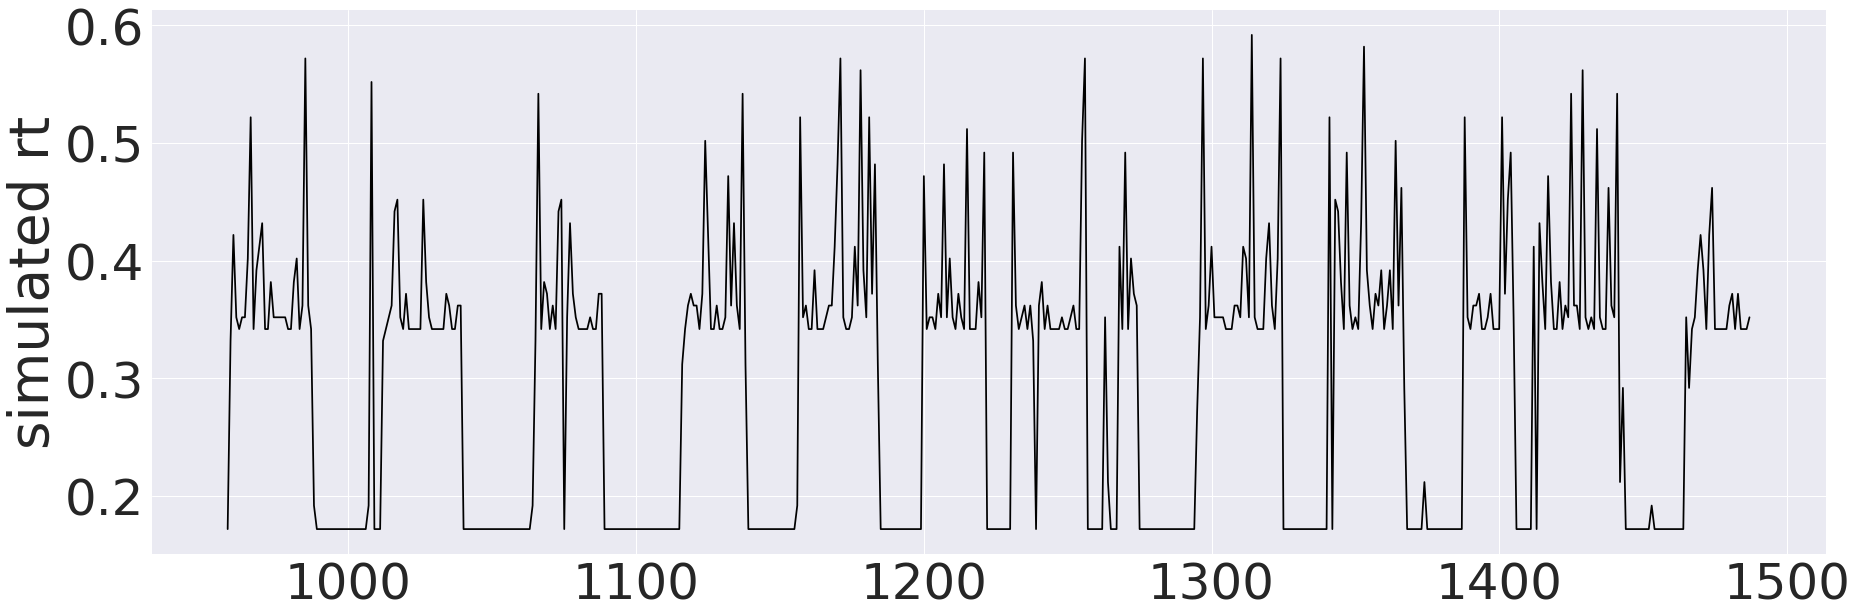

In [22]:
plt.rcParams['figure.figsize'] = 30, 10
sns.set(font_scale=5)
fig = plt.figure()
plt.plot(all_sim_data.rt[(all_sim_data.subj_idx == 0) & (all_sim_data.cond == 'lc')], 'k')
plt.ylabel('simulated rt')

Text(0,0.5,'correct stimulus')

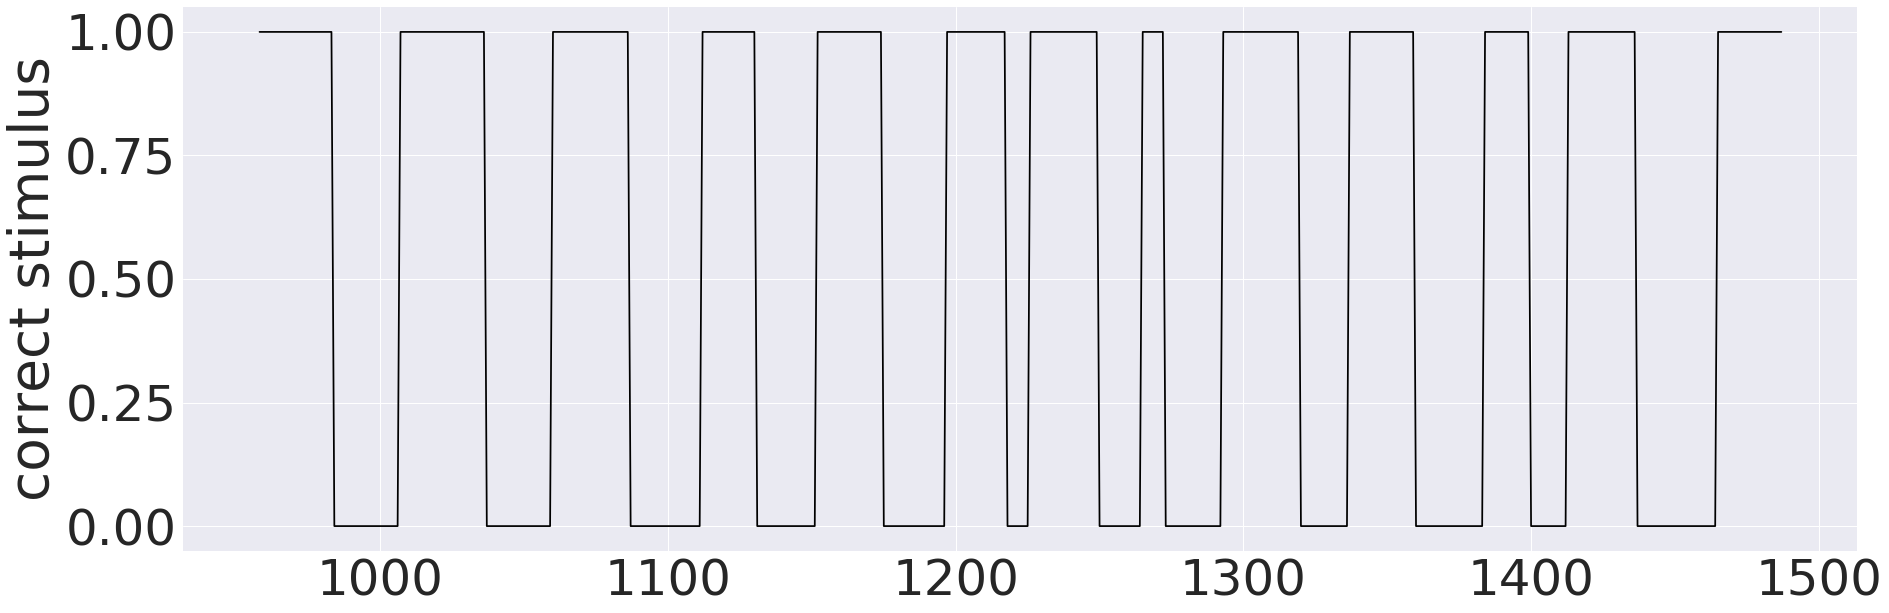

In [23]:
plt.plot(all_sim_data.stimulus[(all_sim_data.subj_idx == 0) & (all_sim_data.cond == 'lc')], 'k')
plt.ylabel('correct stimulus')

In [24]:
n_samples, n_burned_samples, n_thin = 3000, 200, 5

n_samples_test, n_burned_samples_test, n_thin_test = 10, 2, 2

In [25]:
# def t_link_func(x, data=all_sim_data):
#     stim = (np.asarray(dmatrix('0 + C(s,[[1],[-1]])', {'s':data.stimulus.ix[x.index]})))
#     return 1 / (1 + np.exp(-(x * stim)))

# def v_link_func(x, data=all_sim_data):
#     stim = (np.asarray(dmatrix('0 + C(s,[[1],[-1]])', {'s':data.stimulus.ix[x.index]})))
#     return x * stim

In [26]:
#get all permutations of a,t,v
#hold position of learning signals constant to get all combinations 
#of learning signal and parameter pairs 
from itertools import permutations
from more_itertools import chunked

targets = ['a~', 't~', 'v~','z~']
signals = (('cpp:C(cond)', 'B:C(cond)'),)
param_pairs = list(permutations(targets, 2))
learning_signal_pairs = signals*(int(len(param_pairs)/len(signals)))

print(learning_signal_pairs)
print(param_pairs)

(('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'))
[('a~', 't~'), ('a~', 'v~'), ('a~', 'z~'), ('t~', 'a~'), ('t~', 'v~'), ('t~', 'z~'), ('v~', 'a~'), ('v~', 't~'), ('v~', 'z~'), ('z~', 'a~'), ('z~', 't~'), ('z~', 'v~')]


In [27]:
tuple_idx = np.repeat(list(np.arange(len(learning_signal_pairs))),2)
tuple_element_idx = [0,1]*len(learning_signal_pairs)
models = [param_pairs[t_idx][e_idx] + learning_signal_pairs[t_idx][e_idx] for t_idx,e_idx in zip(tuple_idx, tuple_element_idx)]

In [30]:
reg_descriptions = list(chunked(models,2))
print(reg_descriptions)

model_dict = {'a_cpp_t_B': reg_descriptions[0], 'a_cpp_v_B': reg_descriptions[1],
'a_cpp_t_B': reg_descriptions[2], 't_cpp_a_B': reg_descriptions[3], 
't_cpp_v_B': reg_descriptions[4], 't_cpp_t_B': reg_descriptions[5], 
              'v_cpp_a_B': reg_descriptions[6], 'v_cpp_t_B': reg_descriptions[7],
             'v_cpp_t_B': reg_descriptions[8], 't_cpp_a_B': reg_descriptions[9],
             't_cpp_t_B': reg_descriptions[10], 't_cpp_v_B': reg_descriptions[11]}


[['a~cpp:C(cond)', 't~B:C(cond)'], ['a~cpp:C(cond)', 'v~B:C(cond)'], ['a~cpp:C(cond)', 'z~B:C(cond)'], ['t~cpp:C(cond)', 'a~B:C(cond)'], ['t~cpp:C(cond)', 'v~B:C(cond)'], ['t~cpp:C(cond)', 'z~B:C(cond)'], ['v~cpp:C(cond)', 'a~B:C(cond)'], ['v~cpp:C(cond)', 't~B:C(cond)'], ['v~cpp:C(cond)', 'z~B:C(cond)'], ['z~cpp:C(cond)', 'a~B:C(cond)'], ['z~cpp:C(cond)', 't~B:C(cond)'], ['z~cpp:C(cond)', 'v~B:C(cond)']]


In [31]:
a_cpp_t_B_sim_reg = hddm.HDDMRegressor(all_sim_data,model_dict['a_cpp_t_B'], bias=True, group_only_regressors=False)
# a_cpp_t_B_sim_reg.find_starting_values()
a_cpp_t_B_sim_reg.sample(n_samples,burn=n_burned_samples,thin=n_thin, dbname='a_cpp_t_B_sim_reg_3000.db', db='pickle')

Adding these covariates:
['a_Intercept', 'a_cpp:C(cond)[hc]', 'a_cpp:C(cond)[hv]', 'a_cpp:C(cond)[lc]', 'a_cpp:C(cond)[lv]']
Adding these covariates:
['t_Intercept', 't_B:C(cond)[hc]', 't_B:C(cond)[hv]', 't_B:C(cond)[lc]', 't_B:C(cond)[lv]']
 [-----------------100%-----------------] 3001 of 3000 complete in 51184.5 sec

In [32]:
a_cpp_v_B_sim_reg = hddm.HDDMRegressor(all_sim_data,model_dict['a_cpp_v_B'], bias=True, group_only_regressors=False)
# a_cpp_v_B_sim_reg.find_starting_values()
a_cpp_v_B_sim_reg.sample(n_samples,burn=n_burned_samples,thin=n_thin, dbname='a_cpp_v_B_sim_reg_3000.db', db='pickle')

Adding these covariates:
['a_Intercept', 'a_cpp:C(cond)[hc]', 'a_cpp:C(cond)[hv]', 'a_cpp:C(cond)[lc]', 'a_cpp:C(cond)[lv]']
Adding these covariates:
['v_Intercept', 'v_B:C(cond)[hc]', 'v_B:C(cond)[hv]', 'v_B:C(cond)[lc]', 'v_B:C(cond)[lv]']
 [-----------------100%-----------------] 3001 of 3000 complete in 32452.4 sec

In [33]:
t_cpp_a_B_sim_reg = hddm.HDDMRegressor(all_sim_data,model_dict['t_cpp_a_B'], bias=True,group_only_regressors=False)
# t_cpp_a_B_sim_reg.find_starting_values()
t_cpp_a_B_sim_reg.sample(n_samples,burn=n_burned_samples, thin=n_thin, dbname='t_cpp_a_B_sim_reg_3000.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(cond)[hc]', 't_cpp:C(cond)[hv]', 't_cpp:C(cond)[lc]', 't_cpp:C(cond)[lv]']
Adding these covariates:
['a_Intercept', 'a_B:C(cond)[hc]', 'a_B:C(cond)[hv]', 'a_B:C(cond)[lc]', 'a_B:C(cond)[lv]']
 [-----------------100%-----------------] 3001 of 3000 complete in 50263.3 sec

In [34]:
t_cpp_v_B_sim_reg = hddm.HDDMRegressor(all_sim_data,model_dict['t_cpp_v_B'], bias=True, group_only_regressors=False)
# t_cpp_v_B_sim_reg.find_starting_values()
t_cpp_v_B_sim_reg.sample(n_samples,burn=n_burned_samples, thin=n_thin,  dbname='t_cpp_v_B_sim_reg_3000.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(cond)[hc]', 't_cpp:C(cond)[hv]', 't_cpp:C(cond)[lc]', 't_cpp:C(cond)[lv]']
Adding these covariates:
['v_Intercept', 'v_B:C(cond)[hc]', 'v_B:C(cond)[hv]', 'v_B:C(cond)[lc]', 'v_B:C(cond)[lv]']
 [-----------------100%-----------------] 3001 of 3000 complete in 61129.2 sec

In [35]:
v_cpp_a_B_sim_reg = hddm.HDDMRegressor(all_sim_data,model_dict['v_cpp_a_B'],bias=True, group_only_regressors=False)
# v_cpp_a_B_sim_reg.find_starting_values()
v_cpp_a_B_sim_reg.sample(n_samples,burn=n_burned_samples, thin=n_thin,  dbname='v_cpp_a_B_sim_reg_3000.db', db='pickle')

Adding these covariates:
['v_Intercept', 'v_cpp:C(cond)[hc]', 'v_cpp:C(cond)[hv]', 'v_cpp:C(cond)[lc]', 'v_cpp:C(cond)[lv]']
Adding these covariates:
['a_Intercept', 'a_B:C(cond)[hc]', 'a_B:C(cond)[hv]', 'a_B:C(cond)[lc]', 'a_B:C(cond)[lv]']
 [-----------------100%-----------------] 3001 of 3000 complete in 51103.5 sec

In [36]:
v_cpp_t_B_sim_reg = hddm.HDDMRegressor(all_sim_data,model_dict['v_cpp_t_B'],bias=True, group_only_regressors=False)
# v_cpp_t_B_sim_reg.find_starting_values()
v_cpp_t_B_sim_reg.sample(n_samples,burn=n_burned_samples, thin=n_thin, dbname='v_cpp_t_B_sim_reg_3000.db', db='pickle')

Adding these covariates:
['v_Intercept', 'v_cpp:C(cond)[hc]', 'v_cpp:C(cond)[hv]', 'v_cpp:C(cond)[lc]', 'v_cpp:C(cond)[lv]']
Adding these covariates:
['t_Intercept', 't_B:C(cond)[hc]', 't_B:C(cond)[hv]', 't_B:C(cond)[lc]', 't_B:C(cond)[lv]']
 [-----------------100%-----------------] 3001 of 3000 complete in 65554.1 sec

# All $z$ models 

In [37]:
t_cpp_a_B_sim_reg = hddm.HDDMRegressor(all_sim_data, model_dict['t_cpp_a_B'], bias=True, group_only_regressors=False)
# t_cpp_a_B_sim_reg.find_starting_values()
t_cpp_a_B_sim_reg.sample(n_samples, burn=n_burned_samples, thin=n_thin, dbname='t_cpp_a_B_sim_reg_3000.db', db='pickle')

Adding these covariates:
['z_Intercept', 'z_cpp:C(cond)[hc]', 'z_cpp:C(cond)[hv]', 'z_cpp:C(cond)[lc]', 'z_cpp:C(cond)[lv]']
Adding these covariates:
['a_Intercept', 'a_B:C(cond)[hc]', 'a_B:C(cond)[hv]', 'a_B:C(cond)[lc]', 'a_B:C(cond)[lv]']
 [-----------------100%-----------------] 3001 of 3000 complete in 27766.6 sec

In [38]:
#this one can be problematic
t_cpp_v_B_sim_reg = hddm.HDDMRegressor(all_sim_data,model_dict['t_cpp_v_B'], bias=True, group_only_regressors=False)
# t_cpp_v_B_sim_reg.find_starting_values()
t_cpp_v_B_sim_reg.sample(n_samples,burn=n_burned_samples,thin=n_thin, dbname='t_cpp_v_B_sim_reg_3000.db', db='pickle')

Adding these covariates:
['z_Intercept', 'z_cpp:C(cond)[hc]', 'z_cpp:C(cond)[hv]', 'z_cpp:C(cond)[lc]', 'z_cpp:C(cond)[lv]']
Adding these covariates:
['v_Intercept', 'v_B:C(cond)[hc]', 'v_B:C(cond)[hv]', 'v_B:C(cond)[lc]', 'v_B:C(cond)[lv]']
 [-----------------100%-----------------] 3001 of 3000 complete in 32579.0 sec

In [39]:
t_cpp_t_B_sim_reg = hddm.HDDMRegressor(all_sim_data, model_dict['t_cpp_t_B'], bias=True, group_only_regressors=False)
# t_cpp_t_B_sim_reg.find_starting_values()
t_cpp_t_B_sim_reg.sample(n_samples,burn=n_burned_samples,thin=n_thin, dbname='t_cpp_t_B_sim_reg_3000.db', db='pickle')

Adding these covariates:
['z_Intercept', 'z_cpp:C(cond)[hc]', 'z_cpp:C(cond)[hv]', 'z_cpp:C(cond)[lc]', 'z_cpp:C(cond)[lv]']
Adding these covariates:
['t_Intercept', 't_B:C(cond)[hc]', 't_B:C(cond)[hv]', 't_B:C(cond)[lc]', 't_B:C(cond)[lv]']
 [-----------------100%-----------------] 3001 of 3000 complete in 49462.2 sec

In [40]:
a_cpp_t_B_sim_reg = hddm.HDDMRegressor(all_sim_data, model_dict['a_cpp_t_B'], bias=True, group_only_regressors=False)
# a_cpp_t_B_sim_reg.find_starting_values()
a_cpp_t_B_sim_reg.sample(n_samples,burn=n_burned_samples,thin=n_thin, dbname='a_cpp_t_B_sim_reg_3000.db', db='pickle')

Adding these covariates:
['a_Intercept', 'a_cpp:C(cond)[hc]', 'a_cpp:C(cond)[hv]', 'a_cpp:C(cond)[lc]', 'a_cpp:C(cond)[lv]']
Adding these covariates:
['z_Intercept', 'z_B:C(cond)[hc]', 'z_B:C(cond)[hv]', 'z_B:C(cond)[lc]', 'z_B:C(cond)[lv]']
 [-----------------100%-----------------] 3001 of 3000 complete in 20510.8 sec

In [41]:
v_cpp_t_B_sim_reg = hddm.HDDMRegressor(all_sim_data, model_dict['v_cpp_t_B'], bias=True, group_only_regressors=False)
# v_cpp_t_B_sim_reg.find_starting_values()
v_cpp_t_B_sim_reg.sample(n_samples,burn=n_burned_samples,thin=n_thin, dbname='v_cpp_t_B_sim_reg_3000.db', db='pickle')

Adding these covariates:
['v_Intercept', 'v_cpp:C(cond)[hc]', 'v_cpp:C(cond)[hv]', 'v_cpp:C(cond)[lc]', 'v_cpp:C(cond)[lv]']
Adding these covariates:
['z_Intercept', 'z_B:C(cond)[hc]', 'z_B:C(cond)[hv]', 'z_B:C(cond)[lc]', 'z_B:C(cond)[lv]']
 [-----------------100%-----------------] 3001 of 3000 complete in 45623.3 sec

In [42]:
t_cpp_t_B_sim_reg = hddm.HDDMRegressor(all_sim_data, model_dict['t_cpp_t_B'], bias=True, group_only_regressors=False)
# t_cpp_t_B_sim_reg.find_starting_values()
t_cpp_t_B_sim_reg.sample(n_samples,burn=n_burned_samples, thin=n_thin, dbname='t_cpp_t_B_sim_reg_3000.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(cond)[hc]', 't_cpp:C(cond)[hv]', 't_cpp:C(cond)[lc]', 't_cpp:C(cond)[lv]']
Adding these covariates:
['z_Intercept', 'z_B:C(cond)[hc]', 'z_B:C(cond)[hv]', 'z_B:C(cond)[lc]', 'z_B:C(cond)[lv]']
 [-----------------100%-----------------] 3001 of 3000 complete in 37994.1 sec

In [43]:
#send text when the script is done
from twilio.rest import Client
accountSid = 'AC2832bdf83bb5a2f150686d323b7a3440'
authToken = '70363f4f104ac88b8aefc6b7886fb989'
twilioClient = Client(accountSid, authToken)
myTwilioNumber = 6095422252
destCellPhone = 6094242780
myMessage = twilioClient.messages.create(body = "sim t_3000 regressions are done.", from_=myTwilioNumber, to=destCellPhone)

Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting a_Intercept
Plotting a_Intercept_std
Plotting a_cpp:C(cond)[hc]
Plotting a_cpp:C(cond)[hc]_std
Plotting a_cpp:C(cond)[hv]
Plotting a_cpp:C(cond)[hv]_std
Plotting a_cpp:C(cond)[lc]
Plotting a_cpp:C(cond)[lc]_std
Plotting a_cpp:C(cond)[lv]
Plotting a_cpp:C(cond)[lv]_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_B:C(cond)[hc]
Plotting v_B:C(cond)[hc]_std
Plotting v_B:C(cond)[hv]
Plotting v_B:C(cond)[hv]_std
Plotting v_B:C(cond)[lc]


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting v_B:C(cond)[lc]_std
Plotting v_B:C(cond)[lv]
Plotting v_B:C(cond)[lv]_std


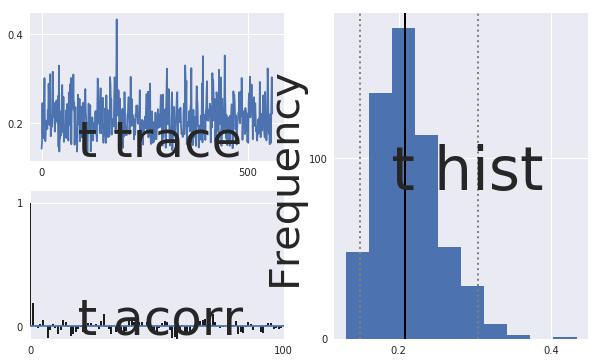

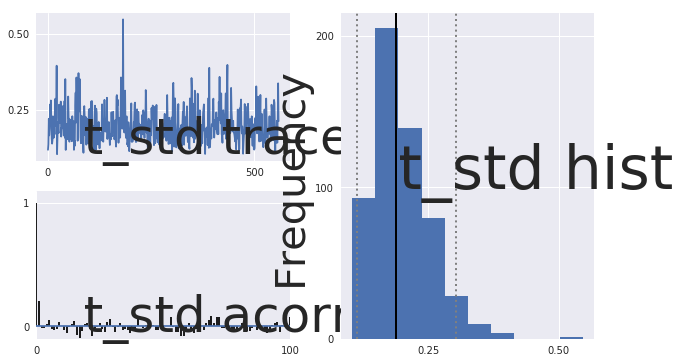

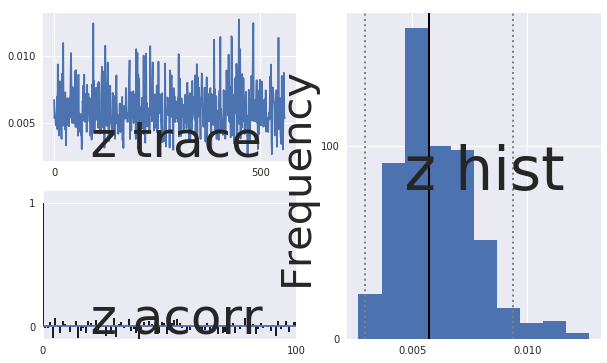

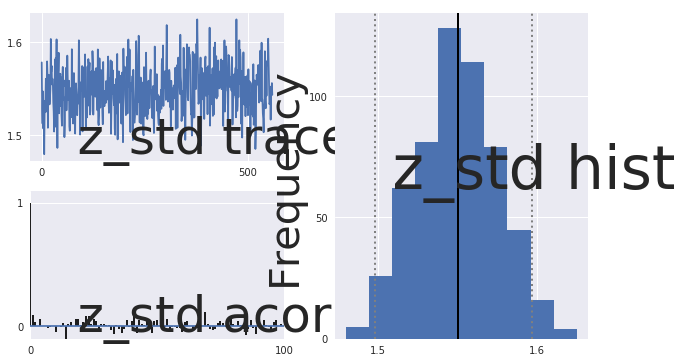

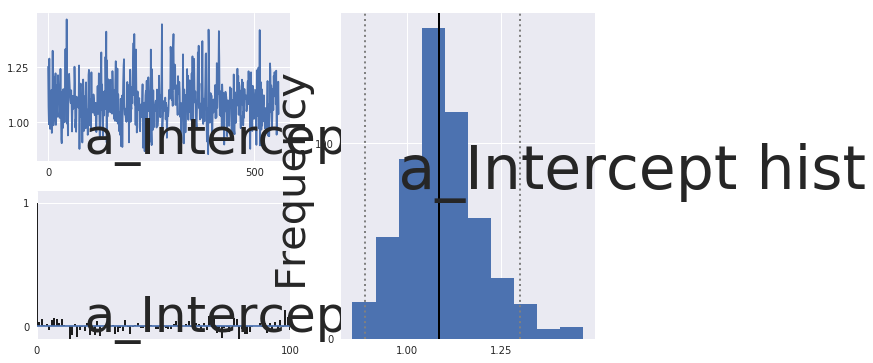

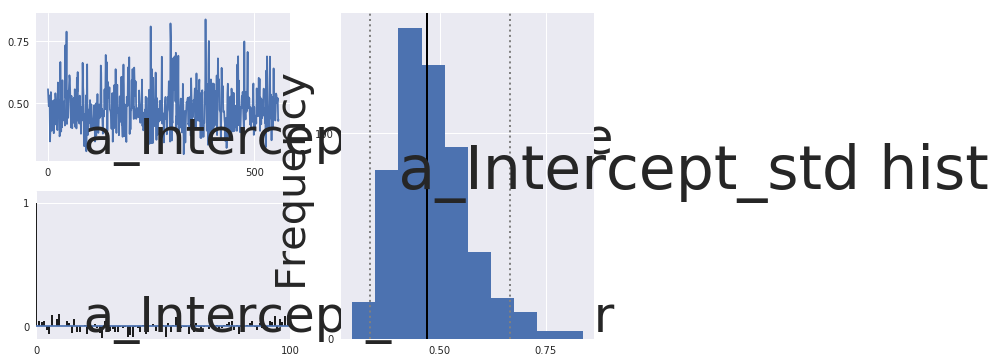

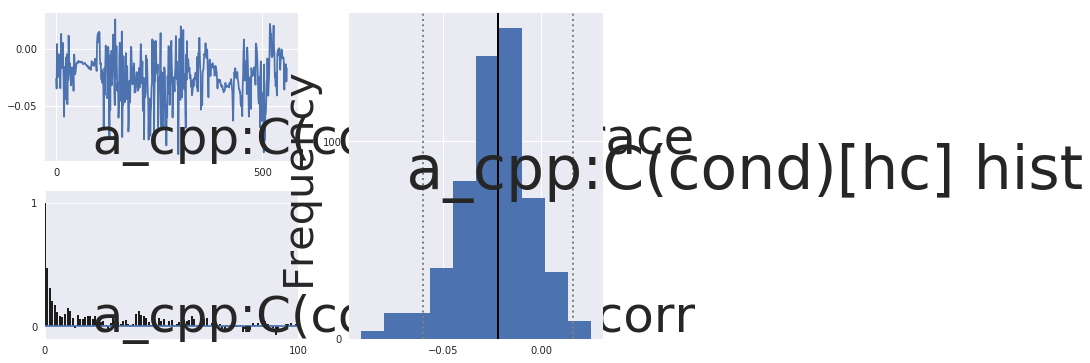

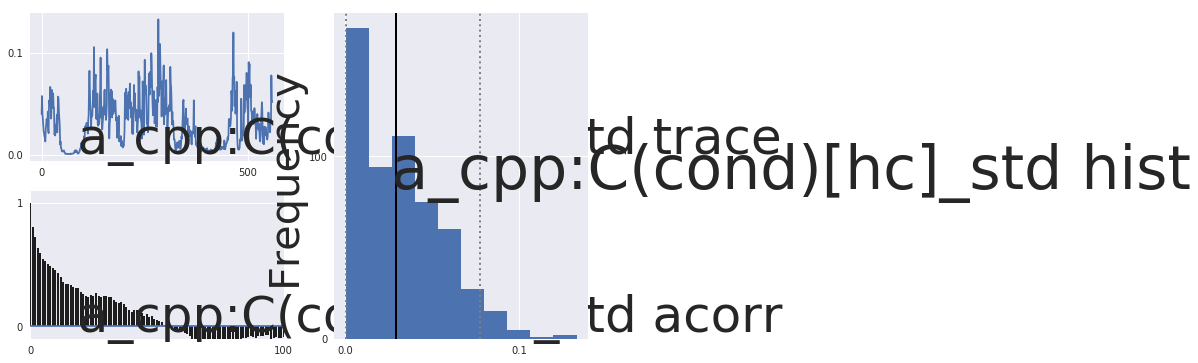

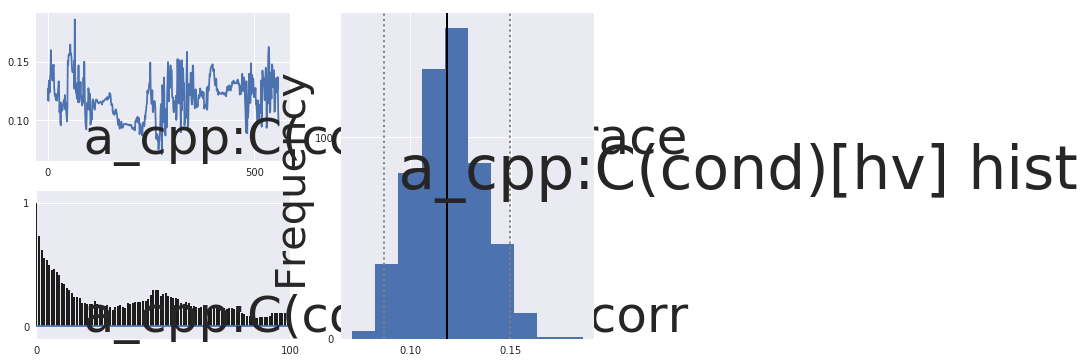

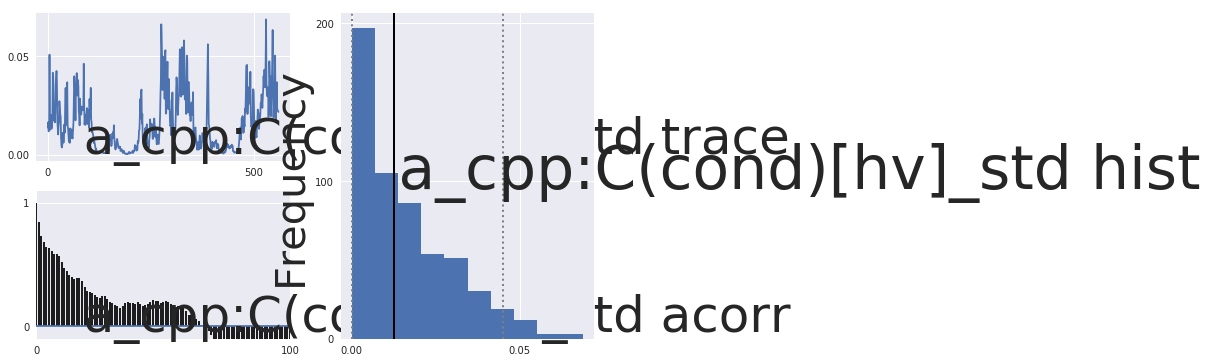

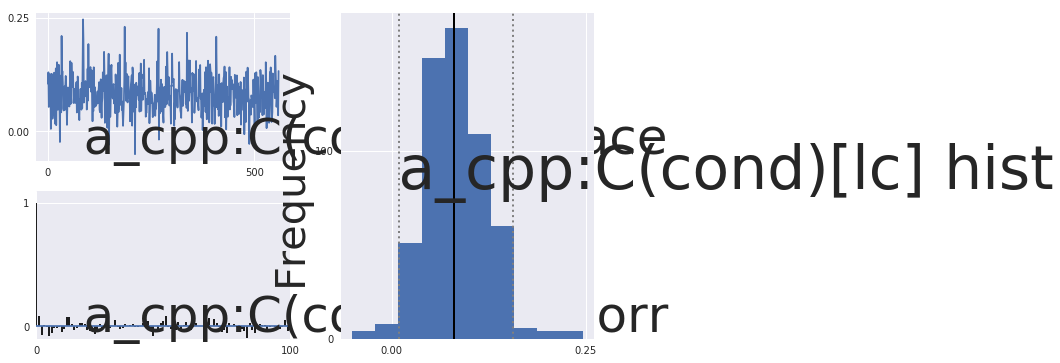

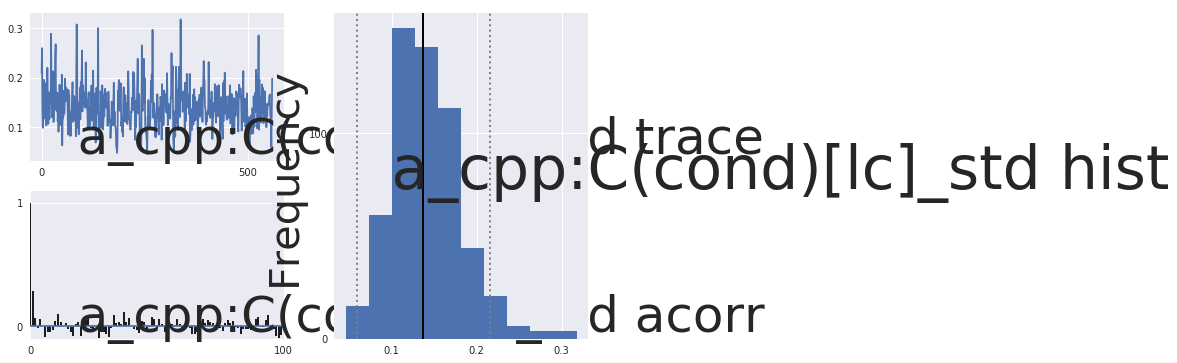

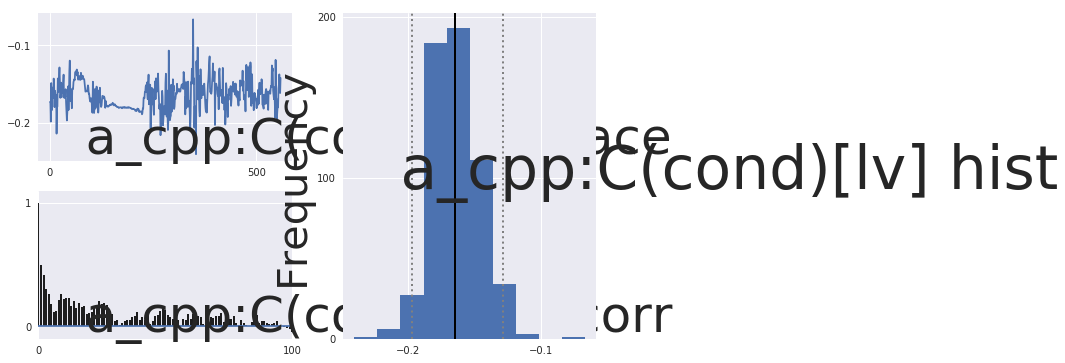

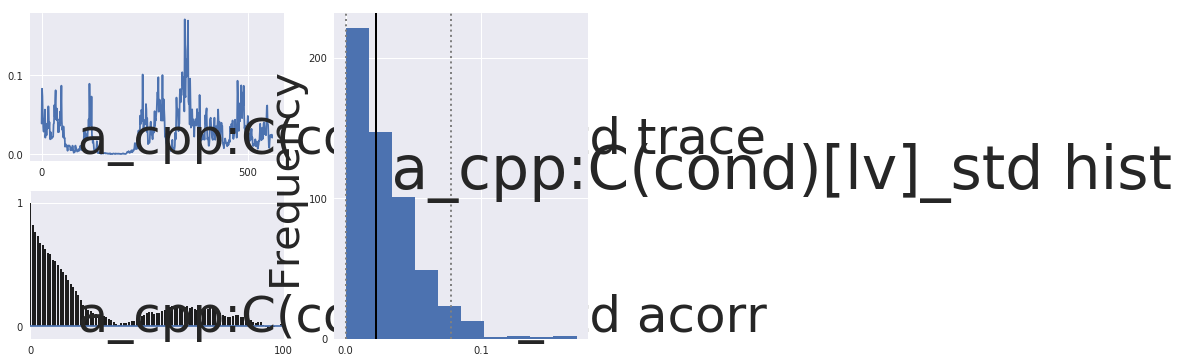

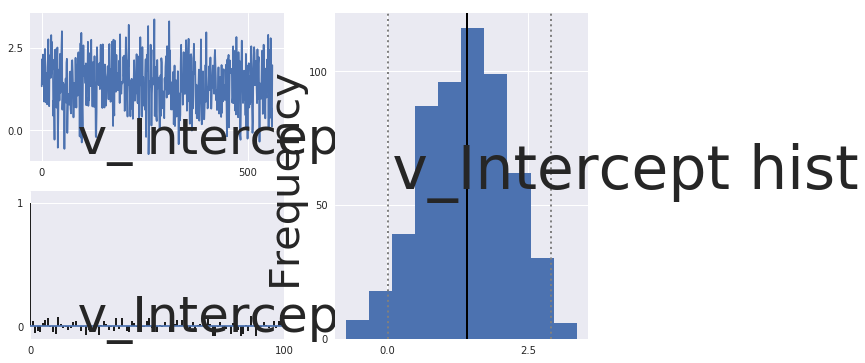

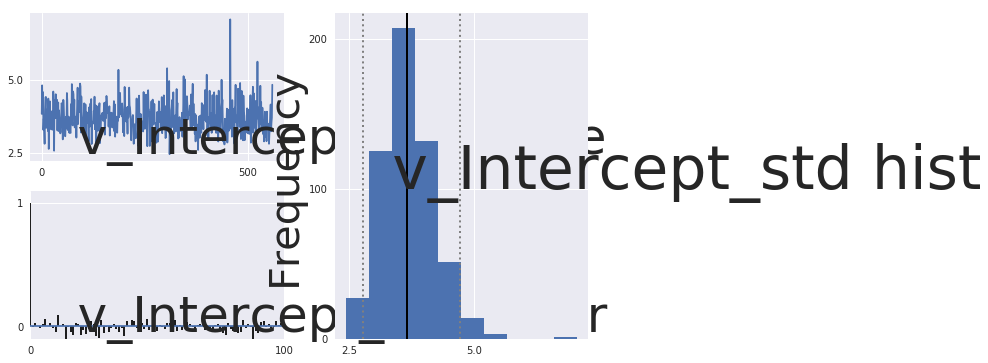

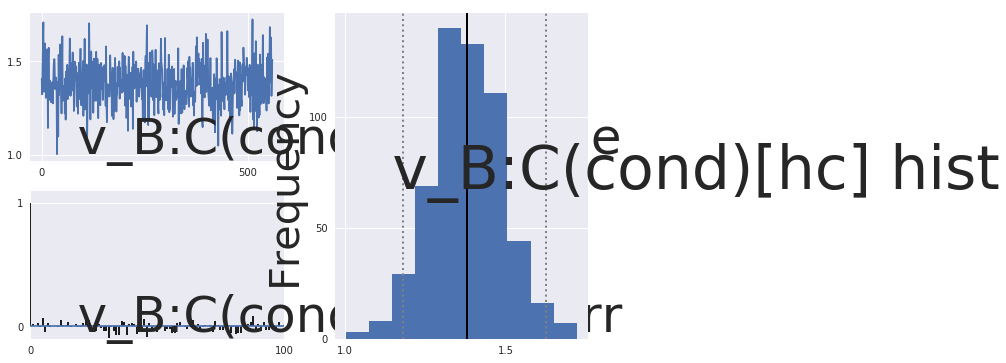

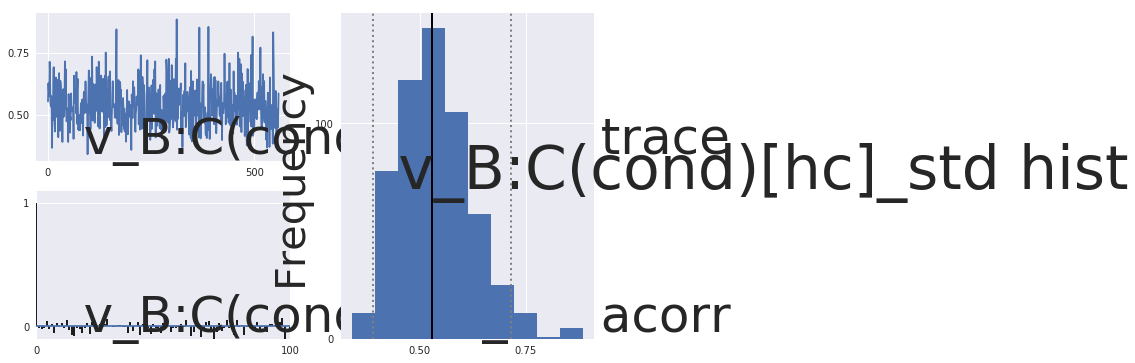

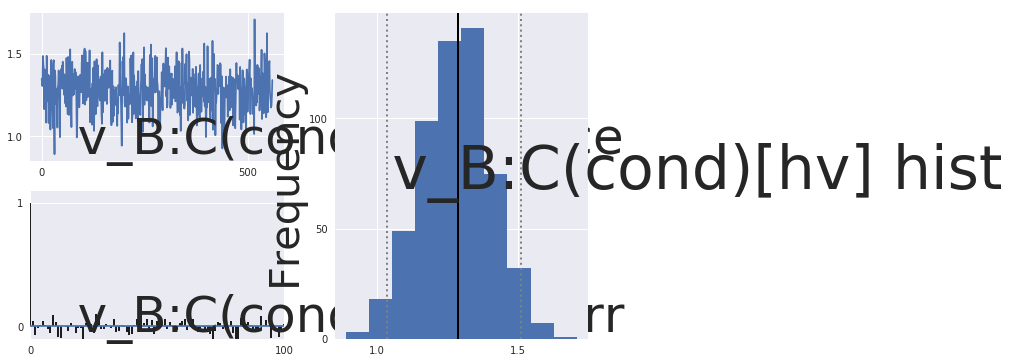

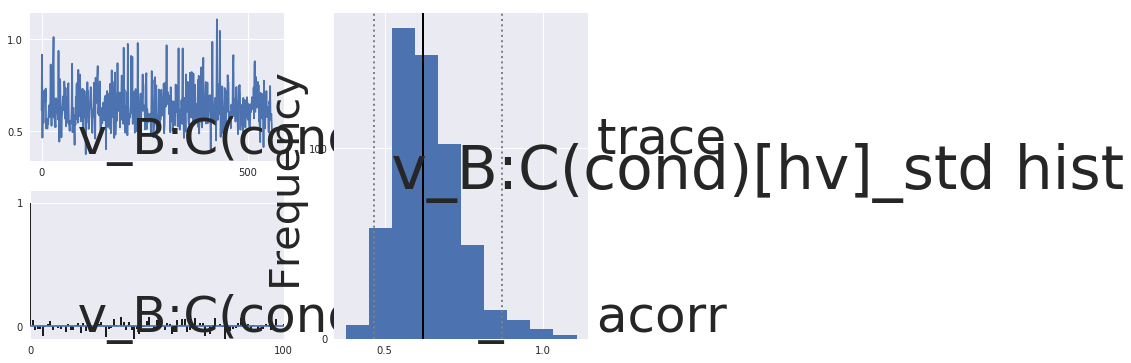

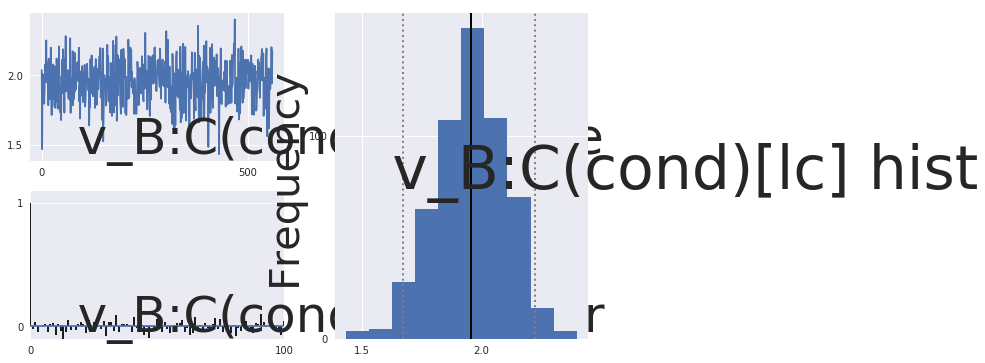

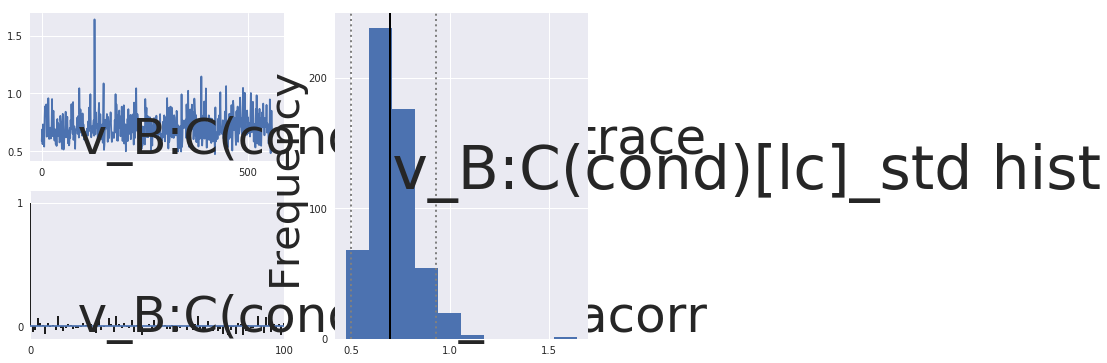

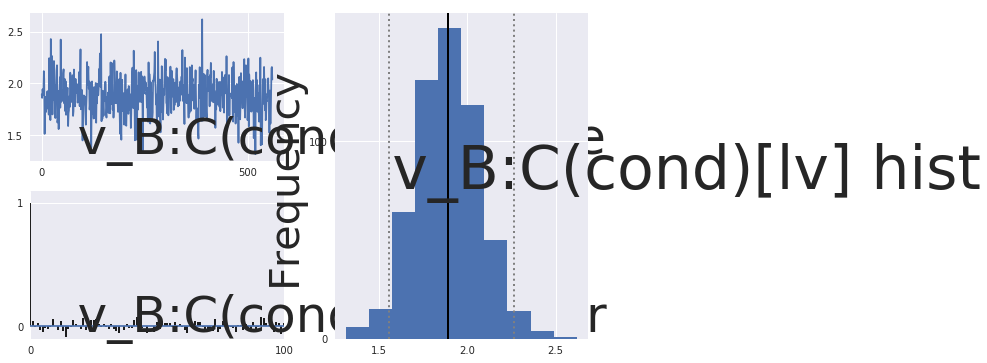

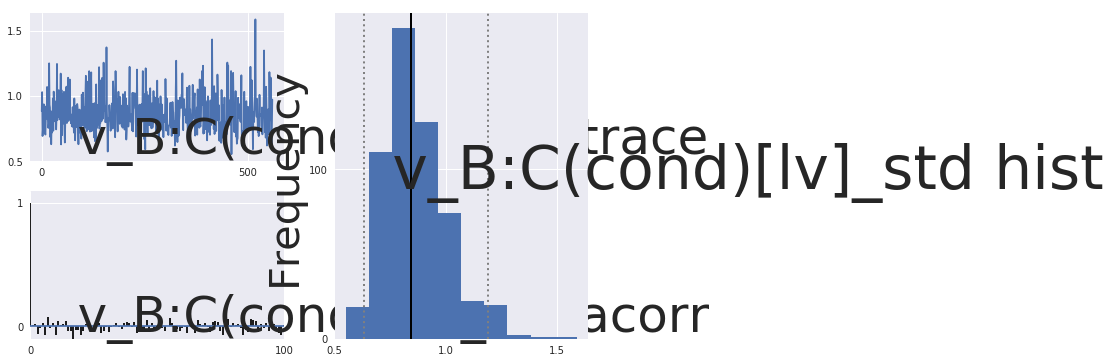

In [59]:
a_cpp_v_B_sim_reg.plot_posteriors()

# Save models

In [44]:
#save models... many many samples, much time
a_cpp_t_B_sim_reg.save(write_dir+'a_cpp_t_B_sim_reg_3000')
a_cpp_v_B_sim_reg.save(write_dir+'a_cpp_v_B_sim_reg_3000')
t_cpp_a_B_sim_reg.save(write_dir+'t_cpp_a_B_sim_reg_3000')

t_cpp_v_B_sim_reg.save(write_dir+'t_cpp_v_B_sim_reg_3000')
v_cpp_a_B_sim_reg.save(write_dir+'v_cpp_a_B_sim_reg_3000')
v_cpp_t_B_sim_reg.save(write_dir+'v_cpp_t_B_sim_reg_3000')

#save z models 
t_cpp_a_B_sim_reg.save(write_dir+'t_cpp_a_B_sim_reg_3000')
t_cpp_v_B_sim_reg.save(write_dir+'t_cpp_v_B_sim_reg_3000')
t_cpp_t_B_sim_reg.save(write_dir+'t_cpp_t_B_sim_reg_3000')

a_cpp_t_B_sim_reg.save(write_dir+'a_cpp_t_B_sim_reg_3000')
v_cpp_t_B_sim_reg.save(write_dir+'v_cpp_t_B_sim_reg_3000')
t_cpp_t_B_sim_reg.save(write_dir+'t_cpp_t_B_sim_reg_3000')

In [ ]:
#test loading
# hddm.load(write_dir+'a_cpp_t_B_sim_reg')
# hddm.load(write_dir+'a_cpp_v_B_sim_reg')
# hddm.load(write_dir+'t_cpp_a_B_sim_reg')

# hddm.load(write_dir+'t_cpp_v_B_sim_reg')
# hddm.load(write_dir+'v_cpp_a_B_sim_reg')
# hddm.load(write_dir+'v_cpp_t_B_sim_reg')

# a_cpp_v_B_sim_reg.save(write_dir+'a_cpp_v_B_sim_reg')
# t_cpp_a_B_sim_reg.save(write_dir+'t_cpp_a_B_sim_reg')

# t_cpp_v_B_sim_reg.save(write_dir+'t_cpp_v_B_sim_reg')
# v_cpp_a_B_sim_reg.save(write_dir+'v_cpp_a_B_sim_reg')
# v_cpp_t_B_sim_reg.save(write_dir+'v_cpp_t_B_sim_reg')

# Plot model fits

In [64]:
dics_z =  [t_cpp_a_B_sim_reg.dic, t_cpp_v_B_sim_reg.dic, t_cpp_a_B_sim_reg.dic,
    a_cpp_t_B_sim_reg.dic, v_cpp_t_B_sim_reg.dic,t_cpp_t_B_sim_reg.dic]

NameError: name 't_cpp_t_B_sim_reg' is not defined

In [65]:
dics_z

[-319919.61636558134, -335702.29856208613, nan, nan, nan, nan]

In [47]:
dics_non_z = [a_cpp_t_B_sim_reg.dic, a_cpp_v_B_sim_reg.dic,t_cpp_a_B_sim_reg.dic,
    t_cpp_v_B_sim_reg.dic, v_cpp_a_B_sim_reg.dic, v_cpp_t_B_sim_reg.dic]
dics_z =  [t_cpp_a_B_sim_reg.dic, t_cpp_v_B_sim_reg.dic, t_cpp_t_B_sim_reg.dic,
    a_cpp_t_B_sim_reg.dic, v_cpp_t_B_sim_reg.dic,t_cpp_t_B_sim_reg.dic]

m_names_non_z = ['a_cpp & t_B', 'a_cpp & v_B', 't_cpp & a_B', 
't_cpp & v_B', 'v_cpp & a_B', 'v_cpp & t_B']

m_names_z =  [ 't_cpp & a_B', 't_cpp & v_B', 't_cpp & t_B',
  'a_cpp & t_B', 'v_cpp & t_B', 't_cpp & t_B']

In [50]:
dics_z, dics_non_z

([-319919.61636558134, -335702.29856208613, nan, nan, nan, nan],
 [-538682.1098548267,
  -337478.74513664836,
  -364555.06770456833,
  -348996.58864450146,
  -322001.46746574872,
  -691048.9009063089])

In [53]:
win_idx = np.where(dics_non_z==min(dics_non_z))[0]
m_names_non_z[win_idx]

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  


'v_cpp & t_B'

In [ ]:
sns.set(font_scale=3)  
 
plt.bar(m_names_non_z, dics_non_z, color='r')
plt.ylim(min(dics_non_z) - 550, max(dics_non_z) + 500)
plt.ylabel('DIC score')
plt.title('Simulated: All unique pairwise combinations of parameters and learning signals')


In [ ]:
m_names[1], m_names[3], m_names[7]

In [ ]:
[dics[1], dics[3], dics[7]]

In [ ]:
plt.bar([m_names[1], m_names[3], m_names[7]], [dics[1], dics[3], dics[7]], color='r')
plt.ylim(dics[3] - 100, dics[2] + 100)
plt.ylabel('DIC score')
plt.title('Simulated: Winning and second-to-winning models')


In [ ]:
diff_first_second = t_cpp_v_B_sim_reg.dic - t_cpp_v_B_sim_reg.dic
print(diff_first_second)

In [ ]:
t_cpp_v_B_sim_reg.nodes_db

# Plot posteriors of regression coefficients

In [60]:
#plot posteriors for winning model 
v_hc_gen, v_hv_gen,  v_lc_gen, v_lv_gen = t_cpp_v_B_sim_reg.nodes_db.ix[['v_B:C(cond)[hc]', 'v_B:C(cond)[hv]', 
                                                             'v_B:C(cond)[lc]', 'v_B:C(cond)[lv]'],
                                                          'node']


t_hc_gen, t_hv_gen, t_lc_gen, t_lv_gen = t_cpp_v_B_sim_reg.nodes_db.ix[['t_cpp:C(cond)[hc]', 't_cpp:C(cond)[hv]', 
                                                             't_cpp:C(cond)[lc]', 't_cpp:C(cond)[lv]'],
                                                          'node']

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


Text(0.5,1,'Posteriors of $\\Omega$:threshold effect')

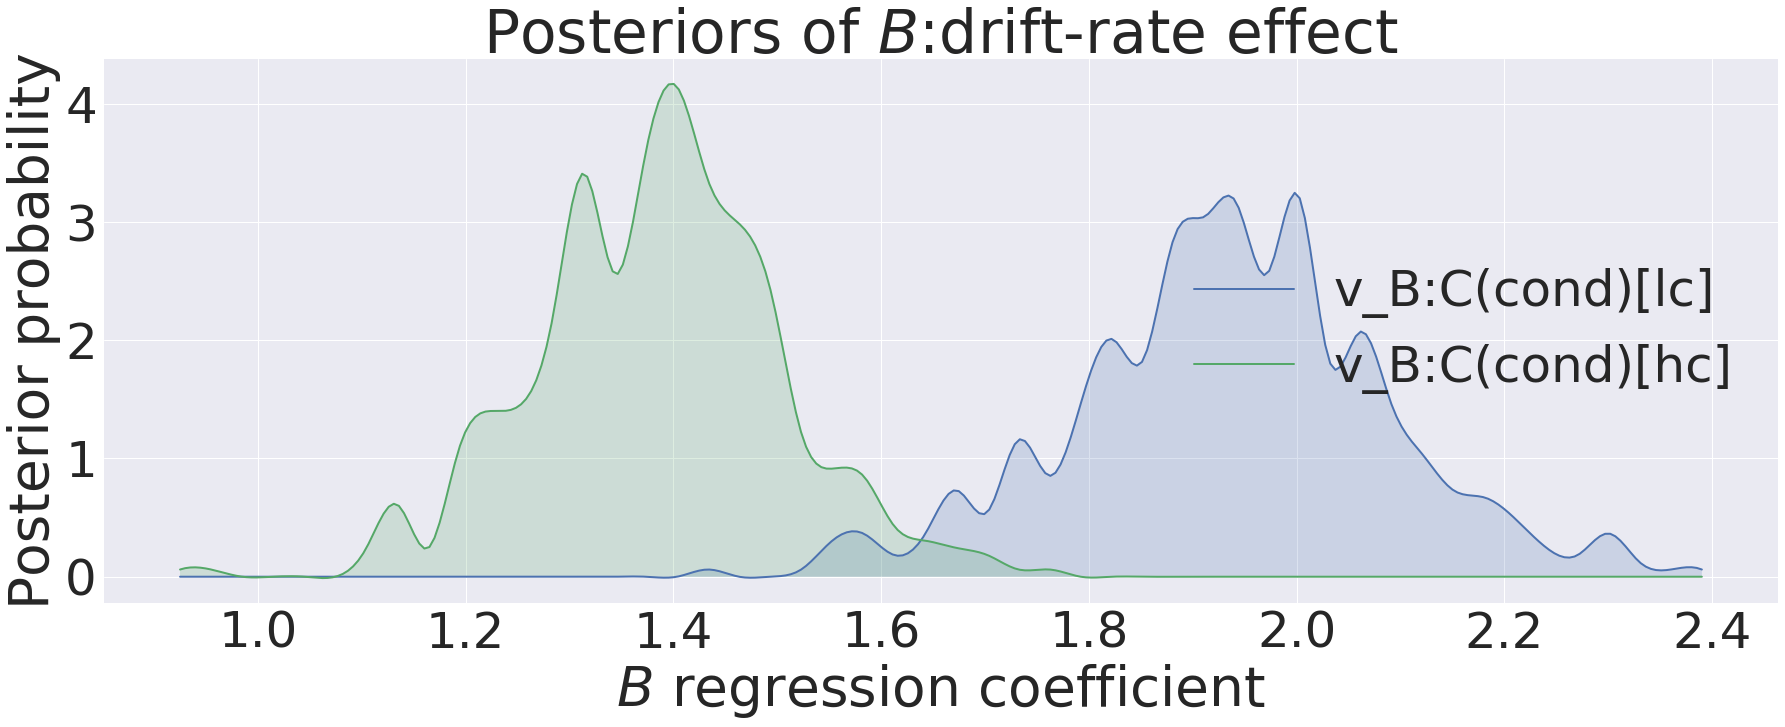

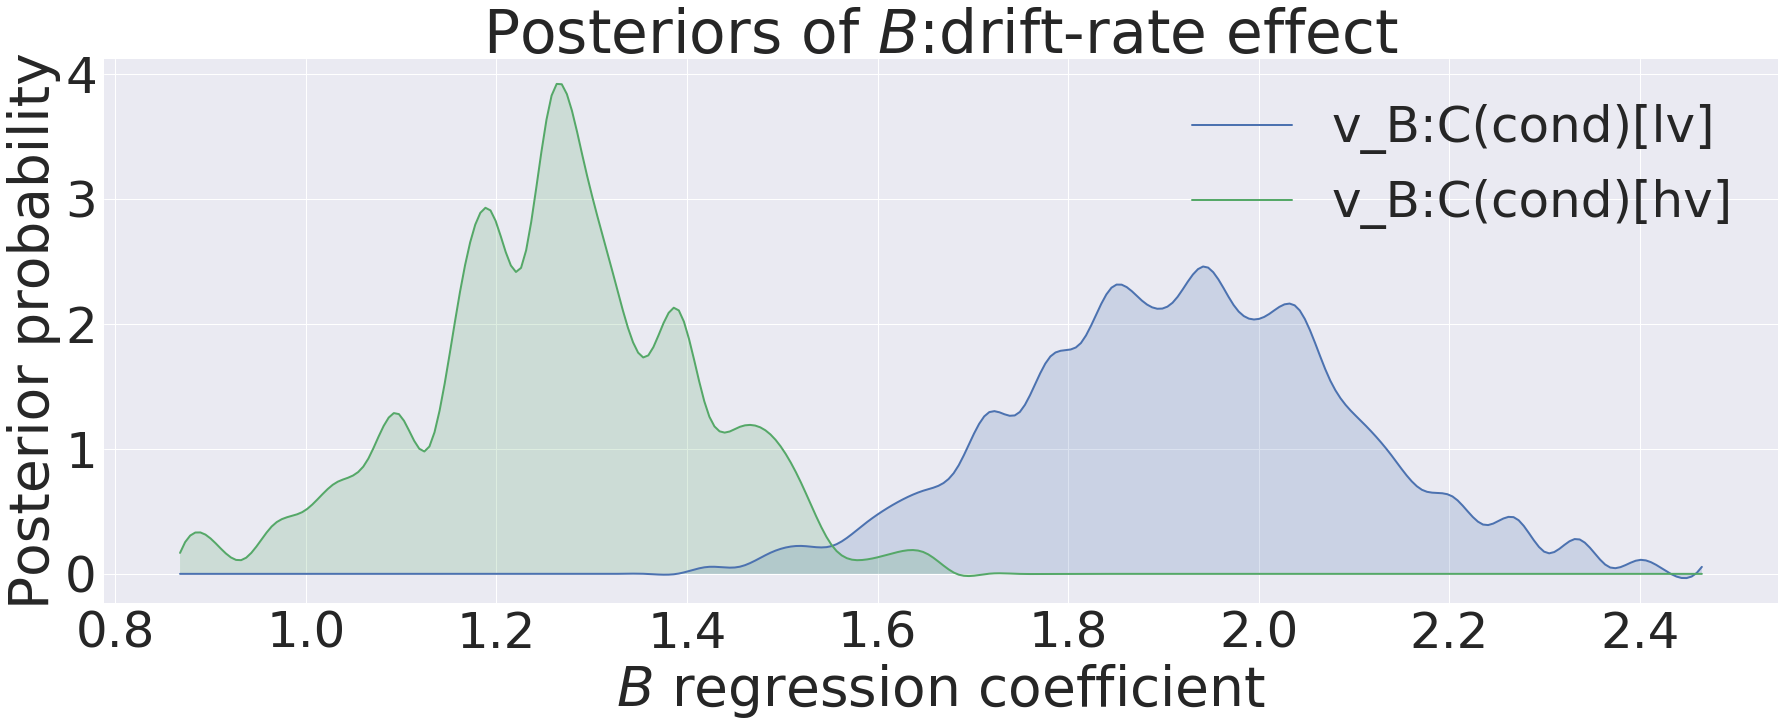

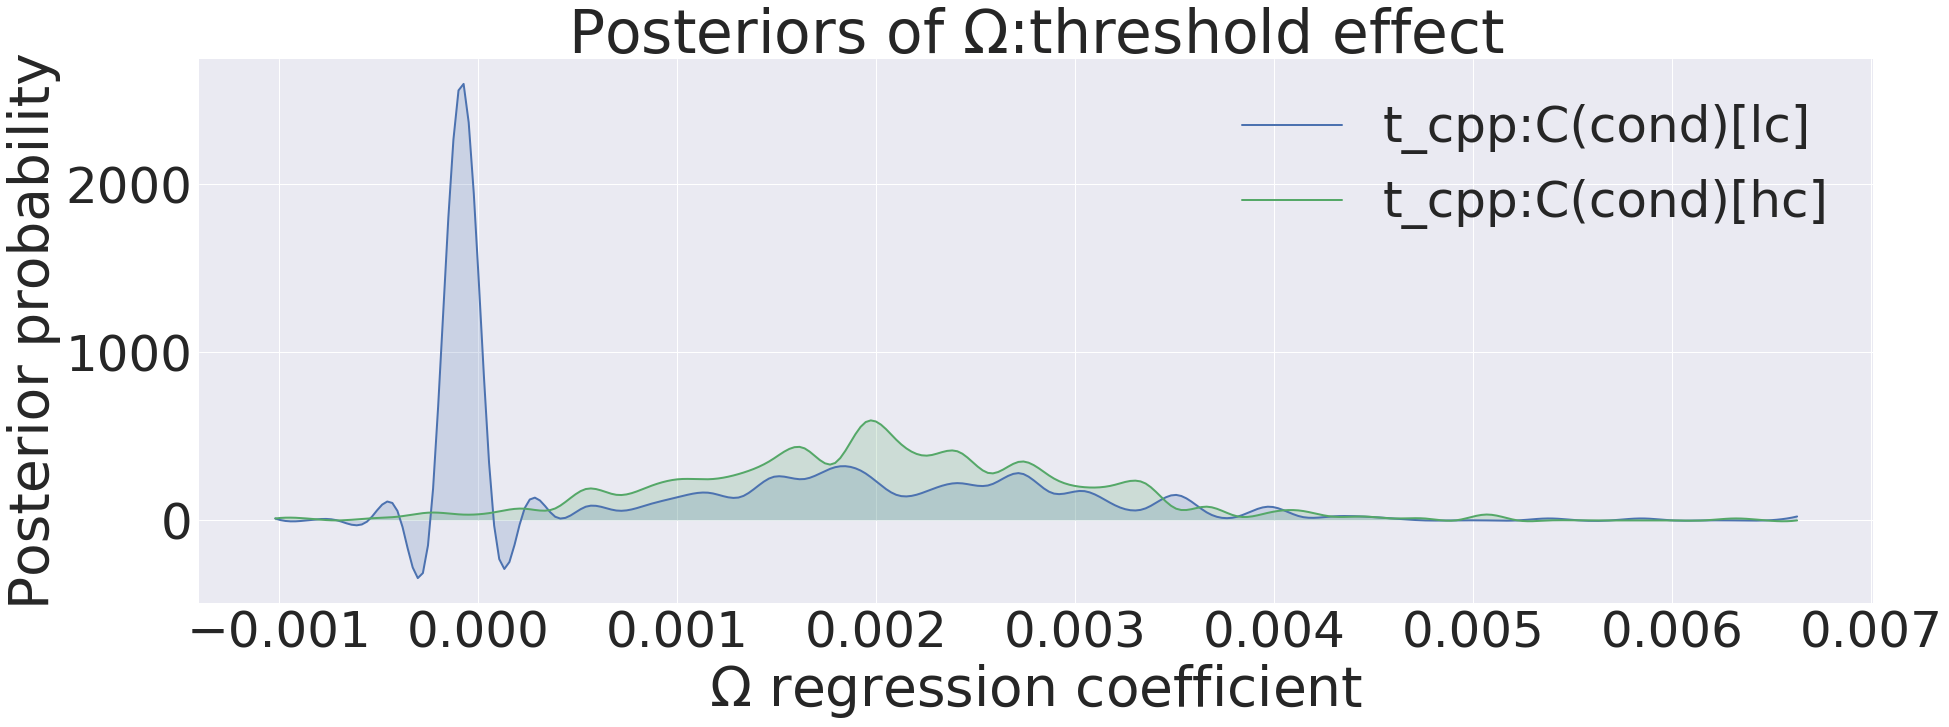

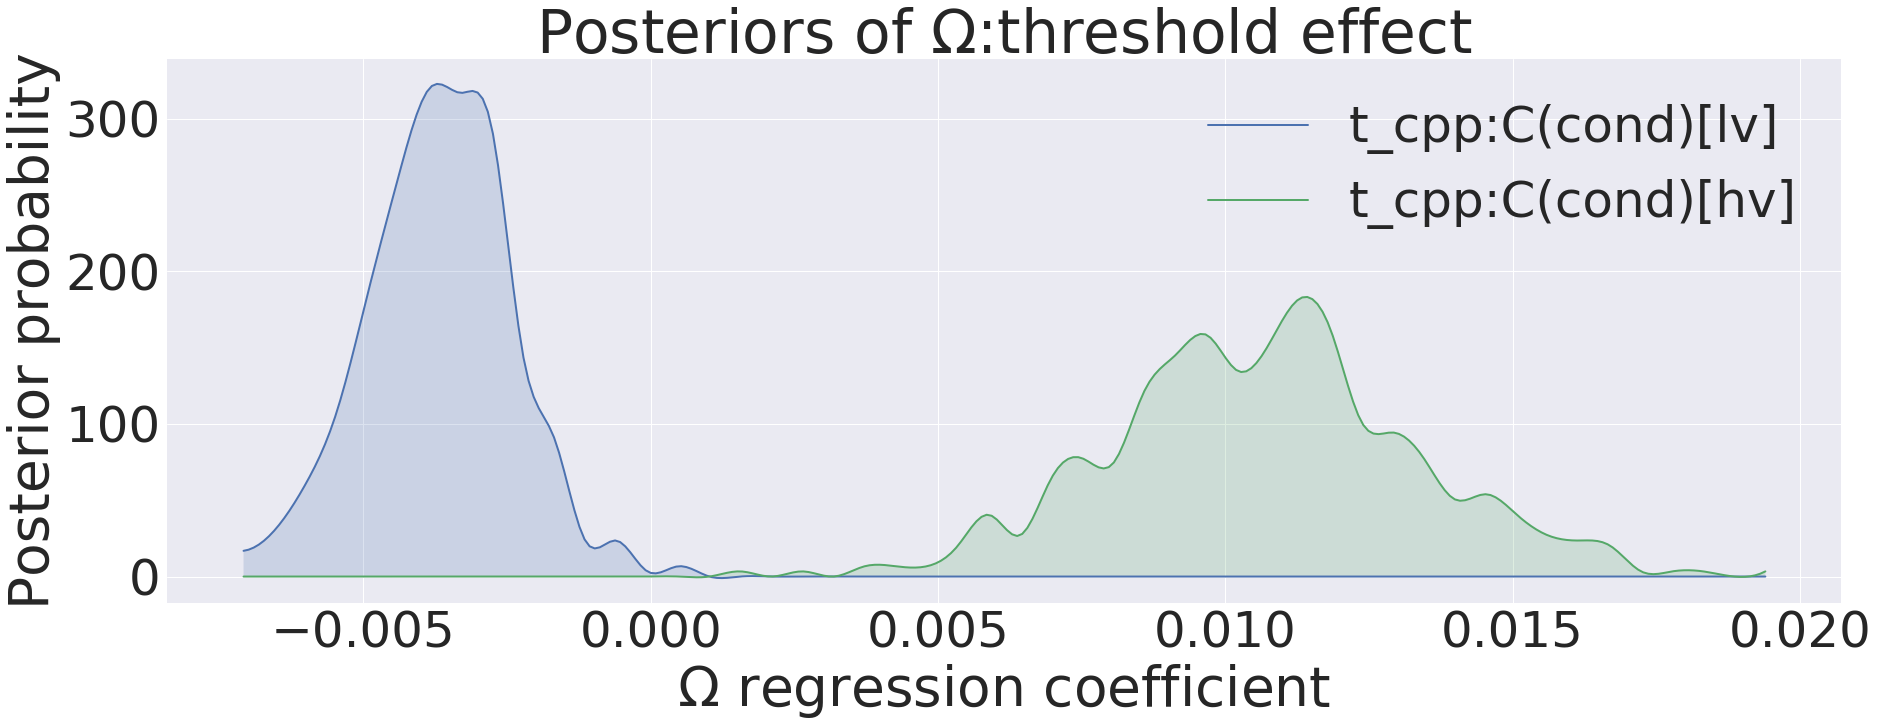

In [61]:
hddm.analyze.plot_posterior_nodes([v_lc_gen, v_hc_gen])
plt.xlabel('$B$ regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of $B$:drift-rate effect')
# plt.savefig('600t_drift_conflict.pdf')

hddm.analyze.plot_posterior_nodes([v_lv_gen, v_hv_gen])
plt.xlabel('$B$ regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of $B$:drift-rate effect')
# plt.savefig('600t_drift_vol.pdf')

hddm.analyze.plot_posterior_nodes([t_lc_gen, t_hc_gen])
plt.xlabel('$\Omega$ regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of $\Omega$:threshold effect')
# plt.savefig('600t_bound_conflict.pdf')


hddm.analyze.plot_posterior_nodes([t_lv_gen, t_hv_gen])
plt.xlabel('$\Omega$ regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of $\Omega$:threshold effect')
# plt.savefig('600t_bound_vol.pdf')


(-0.06, 0.15)

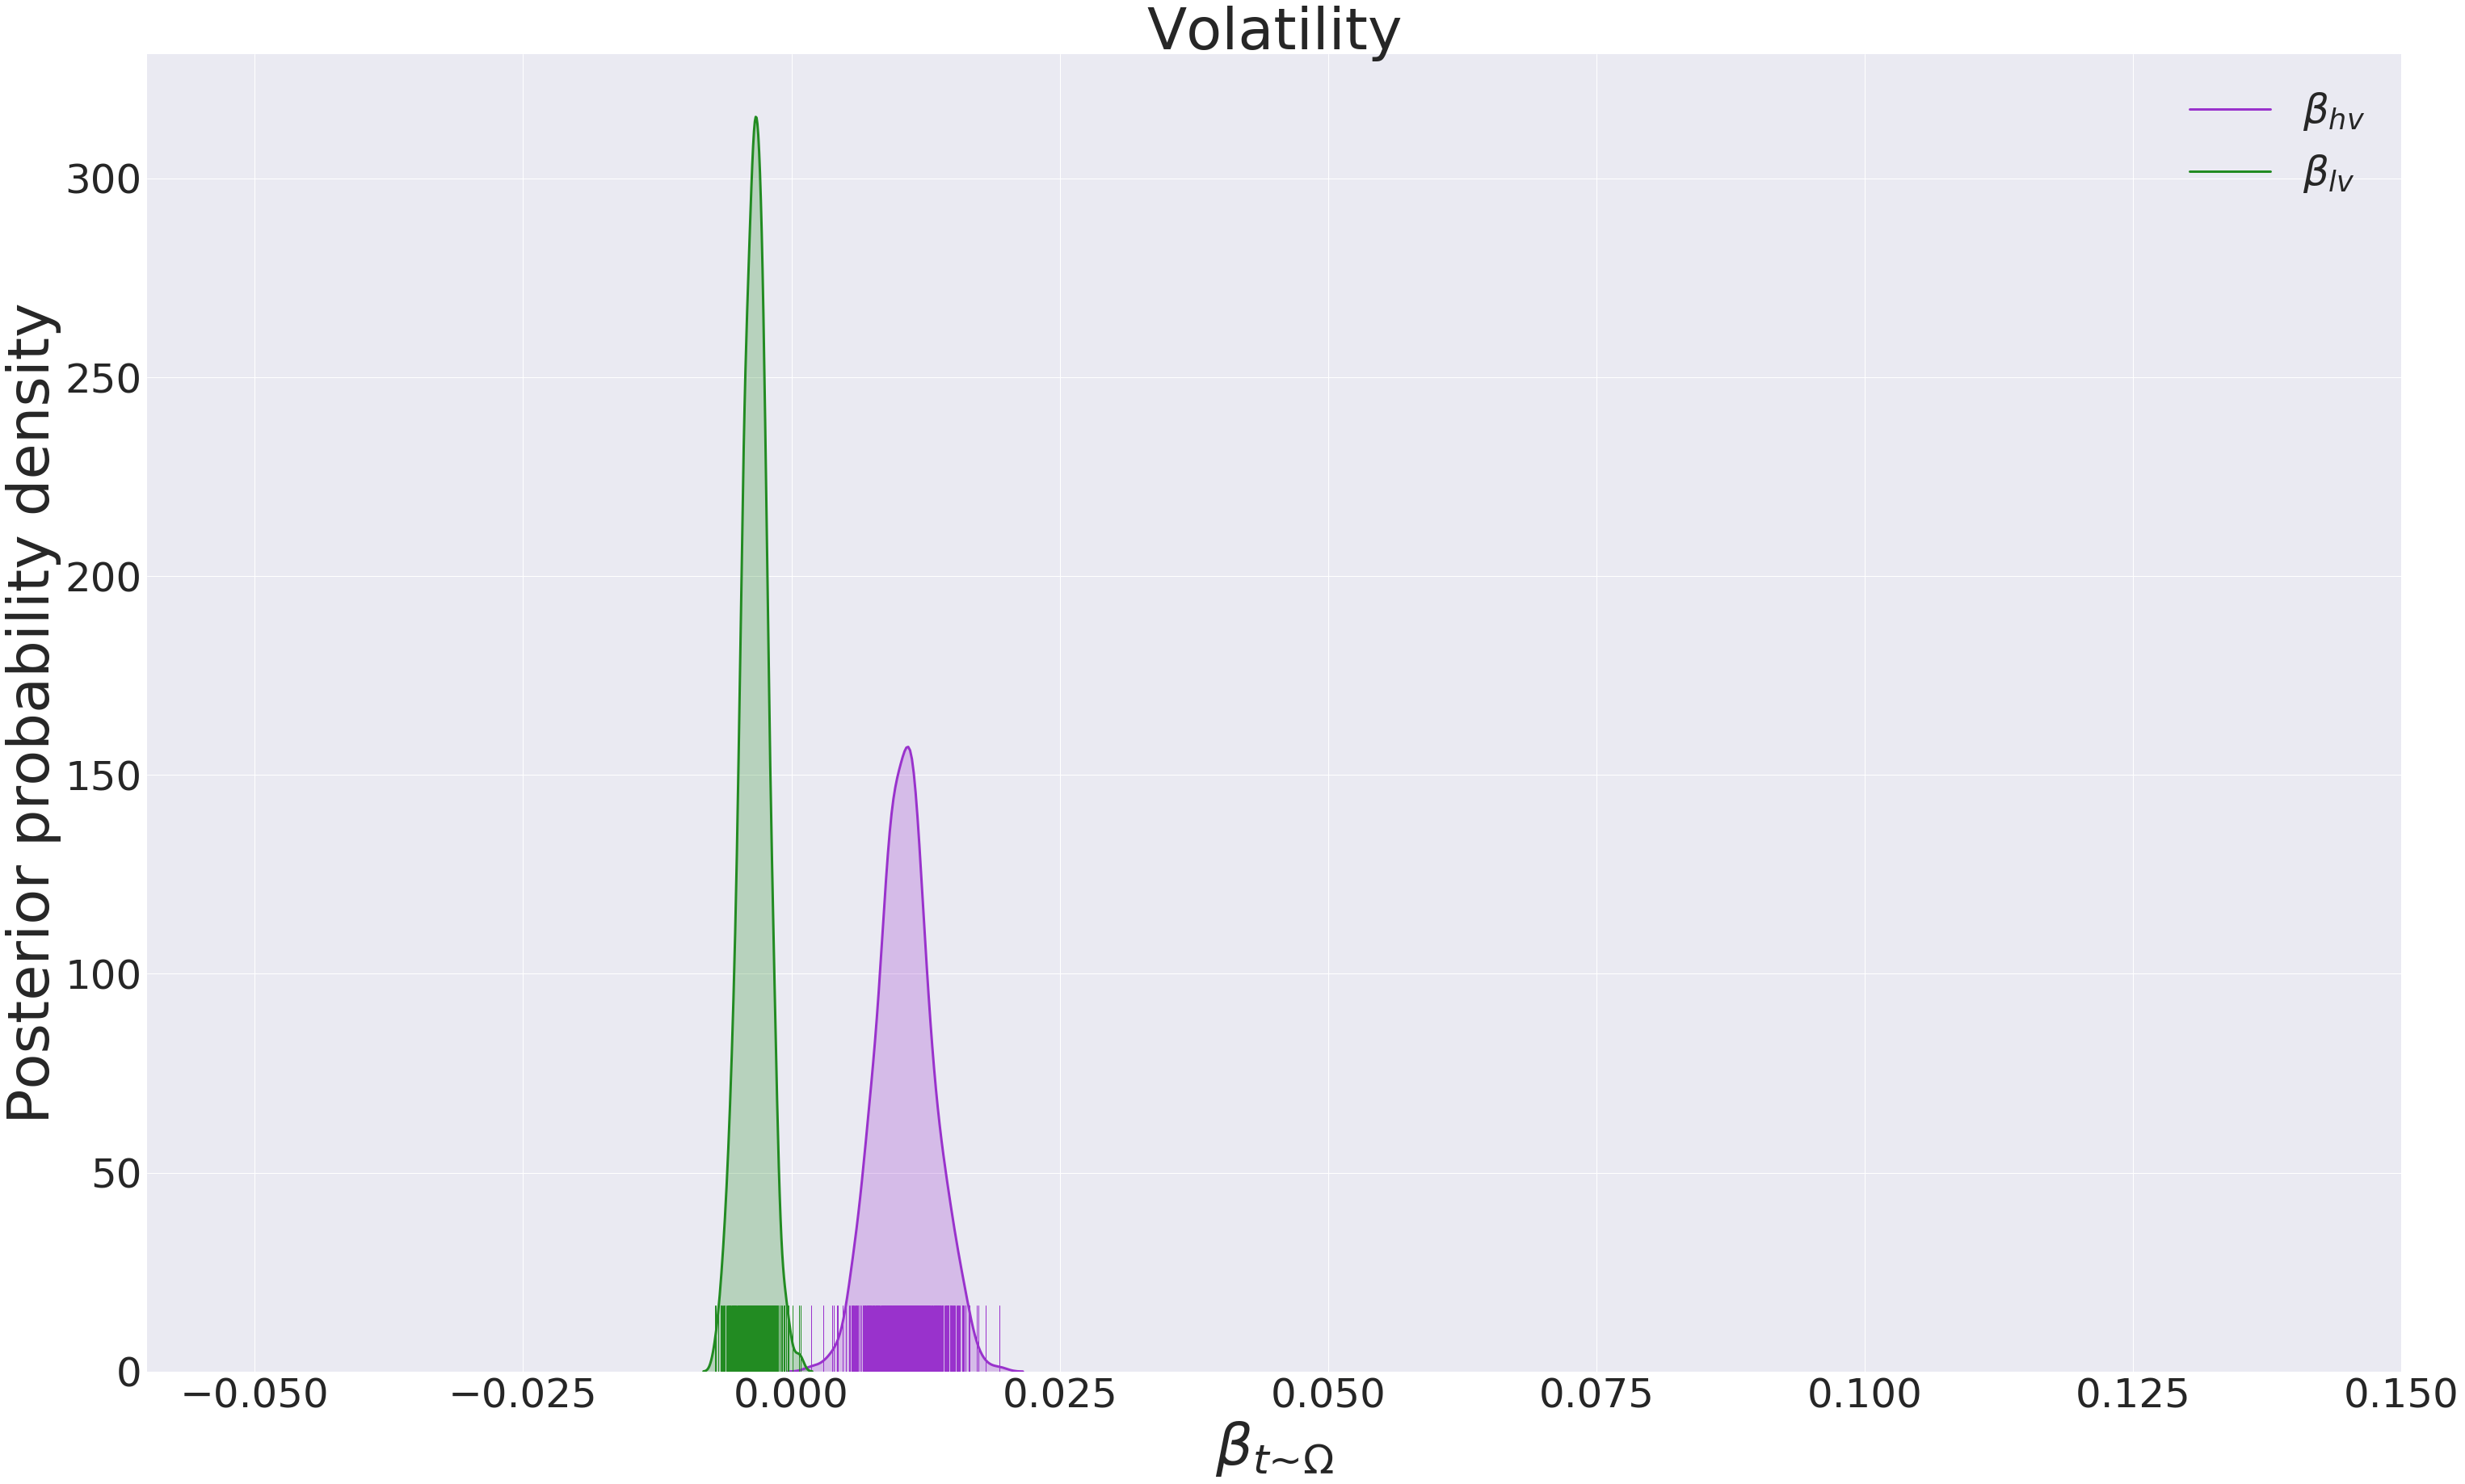

In [63]:
plt.figure(figsize=(50,30))
sns.distplot(t_hv_gen.trace(), label=r'$\beta_{hv}$', hist=False,rug=True,color='darkorchid', kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(t_lv_gen.trace(), label=r'$\beta_{lv}$', hist=False,rug=True,color='forestgreen', kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Volatility',fontsize='large', )
plt.ylabel('Posterior probability density',fontsize='large')
plt.xlabel(r'$\beta_{t\textasciitilde\Omega}$',fontsize='large')
plt.xlim([-.06, .15])
# plt.savefig('tCPP_betas_volatility.png', dpi=600)

In [ ]:
# model_names_header = ', '.join(m_names)
# print_dics = np.column_stack(dics)
# np.savetxt(write_dir+'sim_test_gen_model.csv', print_dics, header=model_names_header, delimiter=',',comments='')

In [ ]:
#ipcluster start

def run_model(id):
    import hddm
    data = hddm.load_csv('mydata.csv')
    m = hddm.HDDM(data)
    m.find_starting_values()
    m.sample(5000, burn=20, dbname='db%i'%id, db='pickle')
    return m

from IPython.parallel import Client
v = Client()[:]
jobs = v.map(run_model, range(4)) # 4 is the number of CPUs
models = jobs.get()
gelman_rubin(models)

# Create a new model that has all traces concatenated
# of individual models.
combined_model = kabuki.utils.concat_models(models)